In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bioinfokit as bio
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [3]:
dataset=pd.read_csv("mcdonalds.csv")
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
dataset.mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_16012\1799472221.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.mean()


Age    44.604955
dtype: float64

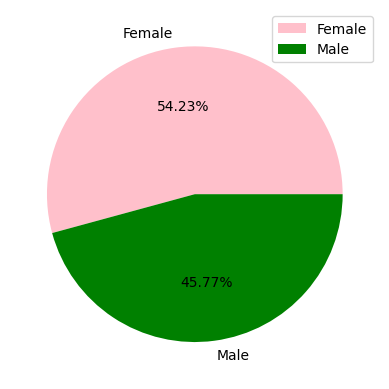

In [8]:
Gender = ["Female", "Male"]
Color = ["pink", "GREEN"]
Size = dataset["Gender"].value_counts()
plt.pie(Size, labels=Gender, colors=Color, autopct="%.2f%%")
plt.legend()
plt.show()

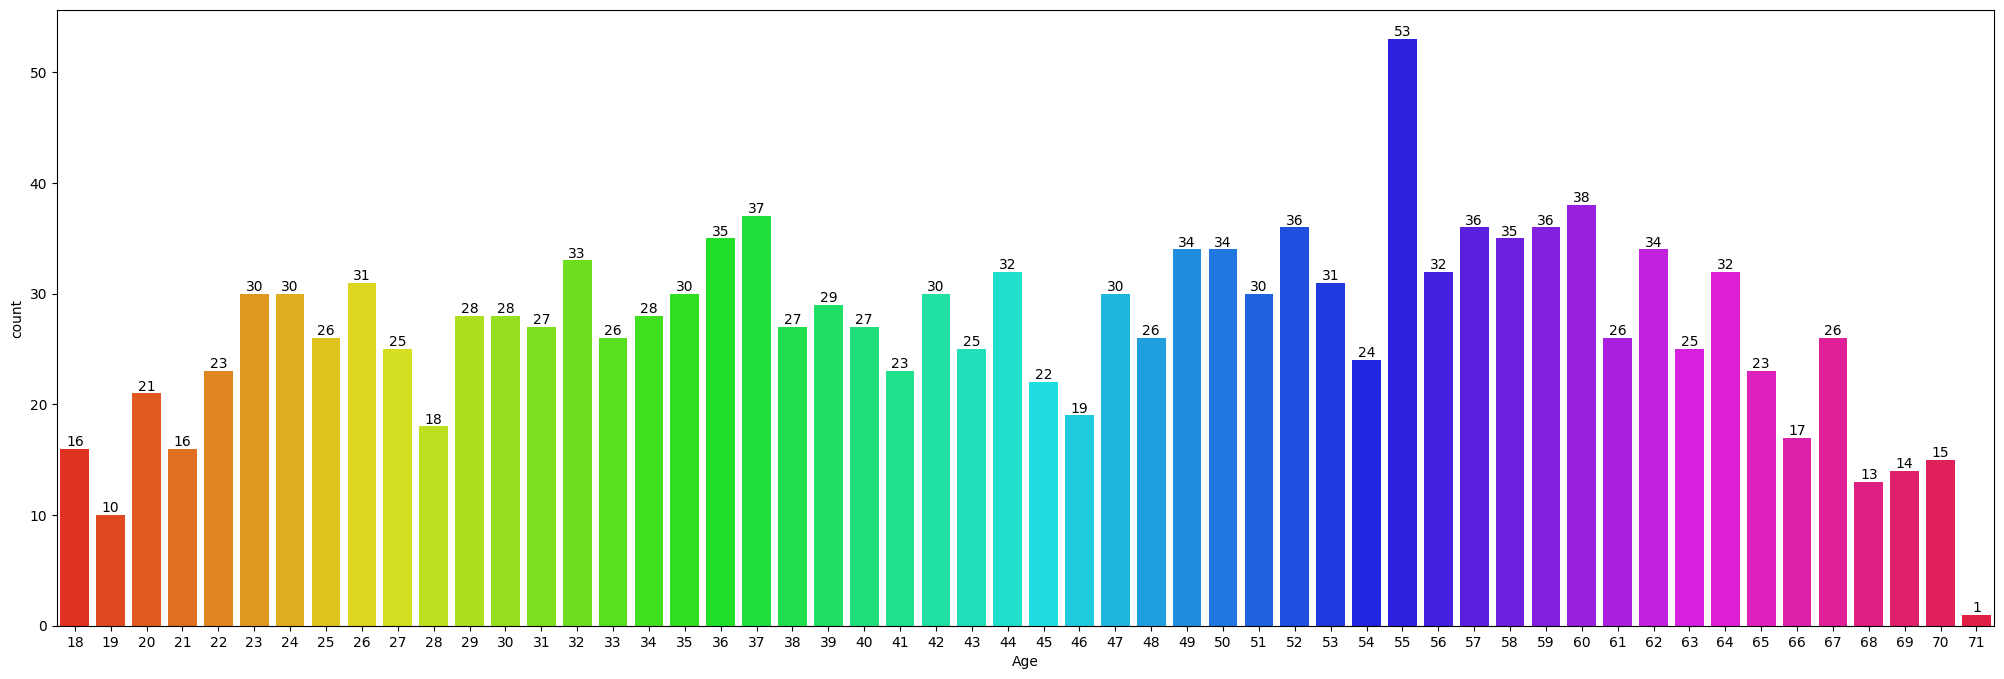

In [10]:
f = sns.countplot(x=dataset["Age"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 9)

In [11]:
dataset["Like"]=dataset["Like"].replace({'I hate it!-5': '-5', 'I love it!+5':'+5'})
dataset.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [14]:

le = LabelEncoder()

cols=["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
    
for i in cols:
    dataset[i]=le.fit_transform(dataset[i])
    

In [15]:
dataset

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>],
       [<Axes: title={'center': 'fattening'}>,
        <Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>],
       [<Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>,
        <Axes: title={'center': 'expensive'}>],
       [<Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

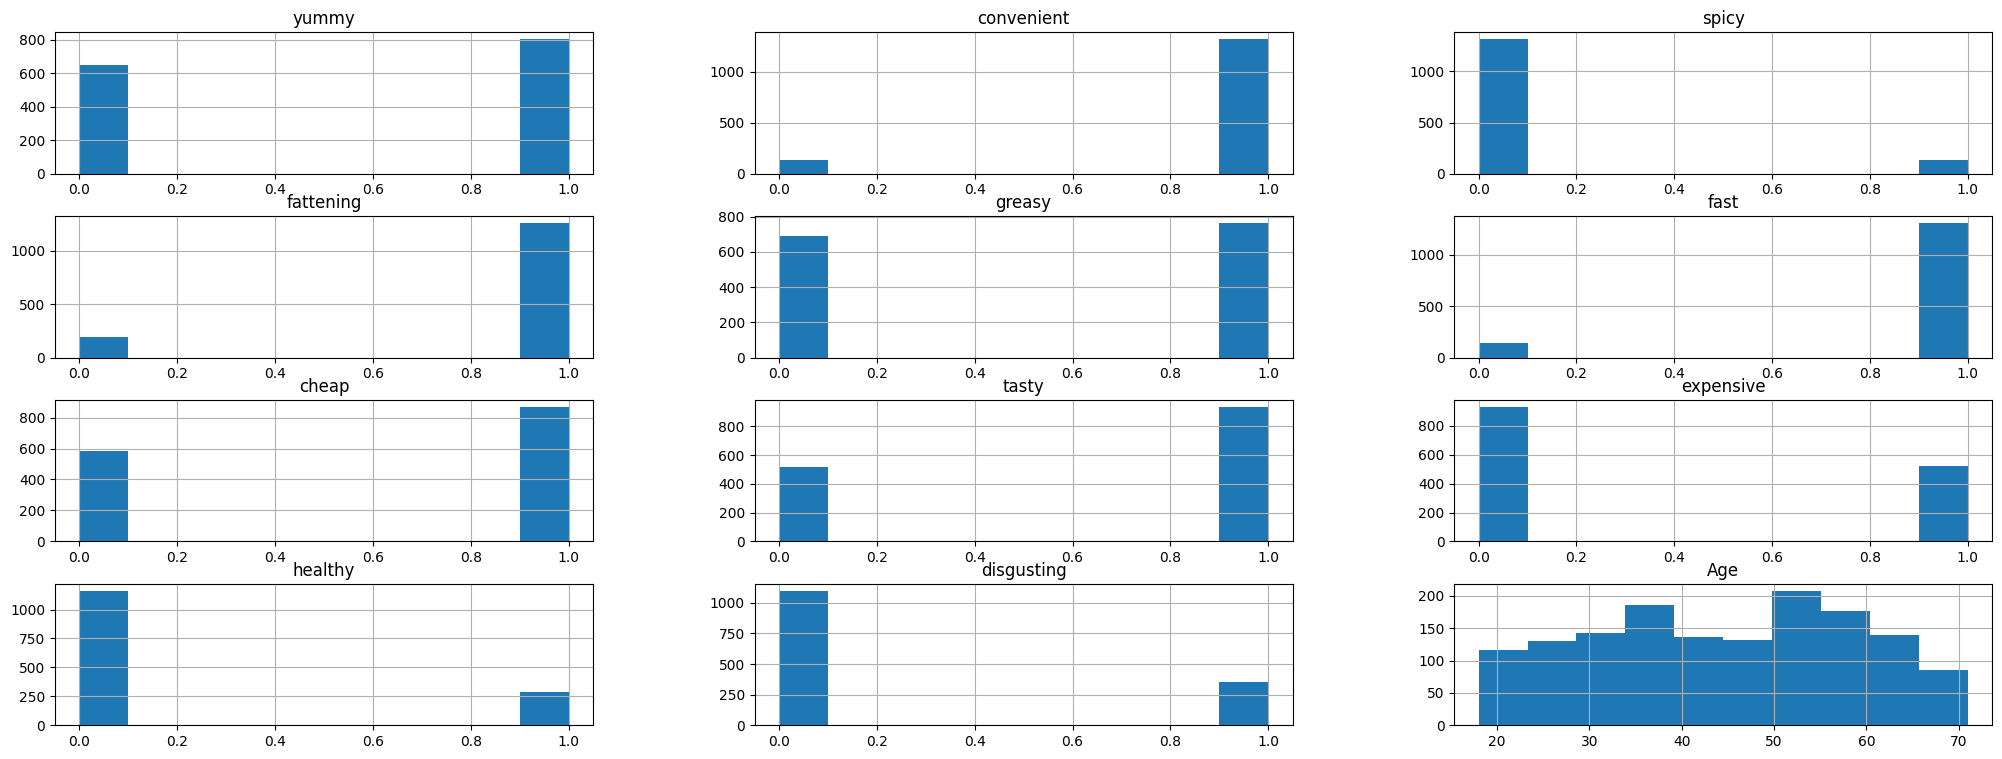

In [16]:
dataset.hist()

In [17]:
x=dataset.loc[:,cols]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [21]:

pca_data = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names=["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8", "pc9", "pc10", "pc11"]
pf = pd.DataFrame(data=pc, columns=names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [22]:
std_dev = []
for i in names:
    std_dev.append(np.std(pf[i]))
    
print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([0.75678896, 0.60724649, 0.50444578, 0.39866134, 0.33728888,
       0.31016782, 0.28959761, 0.27502727, 0.2651598 , 0.24875617,
       0.23682131])

In [23]:
pov = pca.explained_variance_ratio_
print("Proportion of Variance")
pov

Proportion of Variance


array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [24]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [25]:
components = pca.components_
num_pc = pca.n_features_
pc_name = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

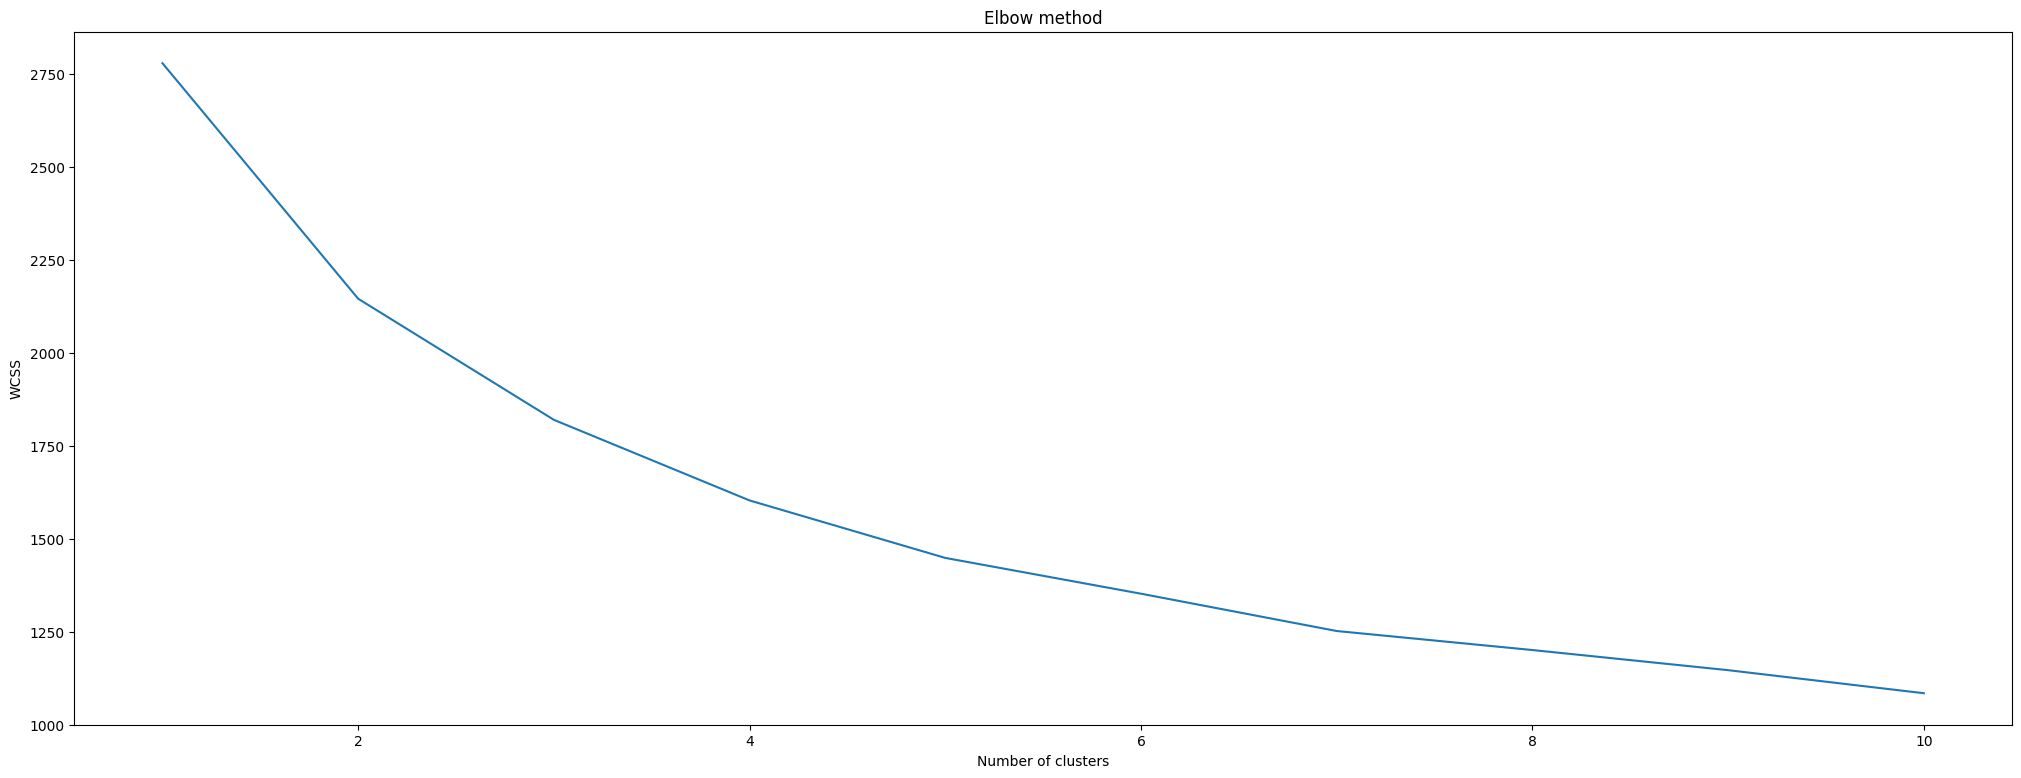

In [26]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [27]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x)
dataset['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 2 2 ... 2 1 3]
1602.9303457472056
9
[[0.02265372 0.89320388 0.0776699  0.92556634 0.66019417 0.95145631
  0.91909385 0.15533981 0.01294498 0.07119741 0.38511327]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.85185185 0.95987654 0.13271605 0.90432099 0.61728395 0.85802469
  0.10802469 0.93209877 0.89814815 0.2037037  0.10493827]
 [0.02083333 0.67916667 0.07916667 0.91666667 0.70833333 0.74583333
  0.06666667 0.08333333 0.89583333 0.0625     0.72916667]]


In [28]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 580, 2: 324, 0: 309, 3: 240})

In [30]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


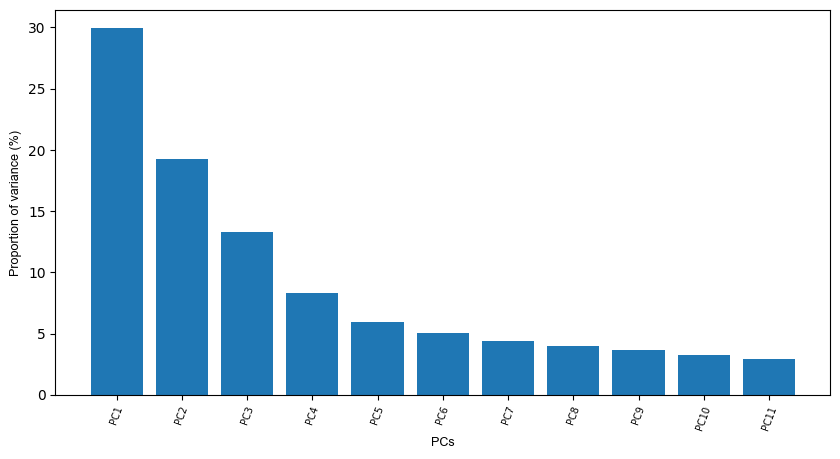

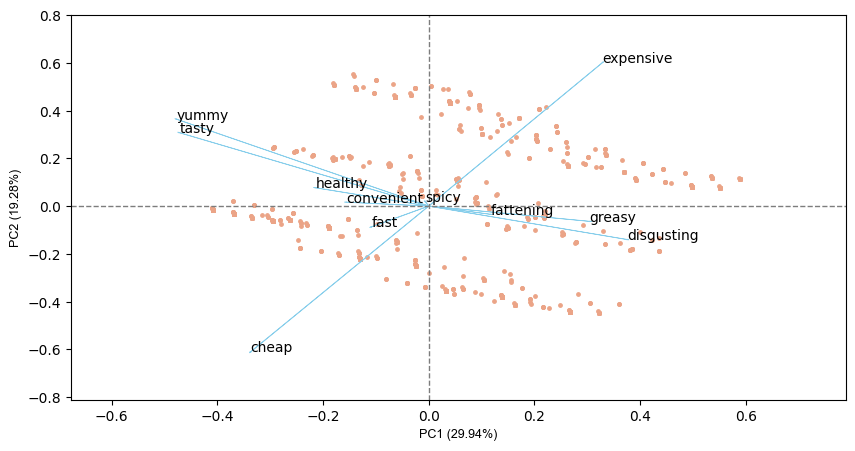

In [31]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))# get PC scores
pca_scores = PCA().fit_transform(x)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=dataset.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

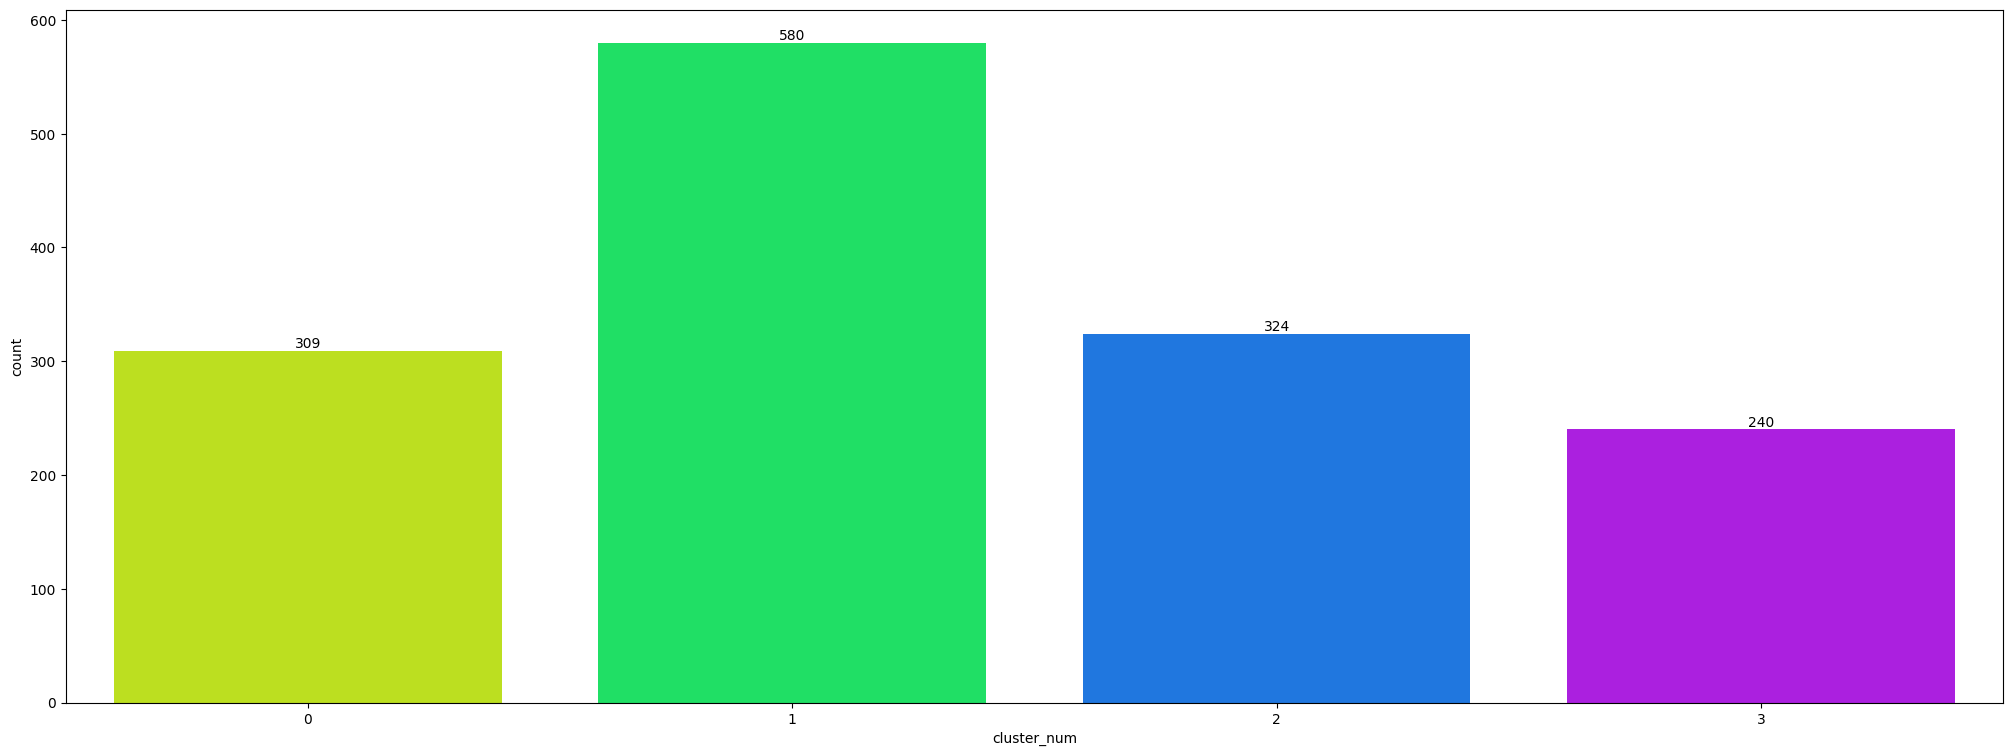

In [32]:
f = sns.countplot(x=dataset["cluster_num"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)
# print(len(dataset['cluster_num'][1]))

In [33]:
dataset1=pd.get_dummies(dataset, prefix=['cluster_num'], columns=['cluster_num'])

In [34]:
dataset1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0,0,1,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0,0,1,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0,1,0,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,0,1,0,0
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,0,0,1,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,0,1,0,0


In [35]:
#Gender
# df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
result=[]
for i in cols:
    Gender = dataset.groupby(['cluster_num'])[i].mean()
    Gender = Gender.to_frame().reset_index()
    result.append(Gender)

In [36]:
for i in range(len(result)):
    print(pd.DataFrame(result[i]))

   cluster_num     yummy
0            0  0.022654
1            1  0.887931
2            2  0.851852
3            3  0.020833
   cluster_num  convenient
0            0    0.893204
1            1    0.981034
2            2    0.959877
3            3    0.679167
   cluster_num     spicy
0            0  0.077670
1            1  0.086207
2            2  0.132716
3            3  0.079167
   cluster_num  fattening
0            0   0.925566
1            1   0.794828
2            2   0.904321
3            3   0.916667
   cluster_num    greasy
0            0  0.660194
1            1  0.329310
2            2  0.617284
3            3  0.708333
   cluster_num      fast
0            0  0.951456
1            1  0.960345
2            2  0.858025
3            3  0.745833
   cluster_num     cheap
0            0  0.919094
1            1  0.922414
2            2  0.108025
3            3  0.066667
   cluster_num     tasty
0            0  0.155340
1            1  0.975862
2            2  0.932099
3         

In [37]:
dataset1=pd.get_dummies(dataset, prefix=['VisitFrequency'], columns=['VisitFrequency'])
dataset1


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,Gender,cluster_num,VisitFrequency_Every three months,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year
0,0,1,0,1,0,1,1,0,1,0,...,-3,61,Female,0,1,0,0,0,0,0
1,1,1,0,1,1,1,1,1,1,0,...,+2,51,Female,2,1,0,0,0,0,0
2,0,1,1,1,1,1,0,1,1,1,...,+1,62,Female,2,1,0,0,0,0,0
3,1,1,0,1,1,1,1,1,0,0,...,+4,69,Female,1,0,0,0,0,1,0
4,0,1,0,1,1,1,1,0,0,1,...,+2,49,Male,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,-5,47,Male,3,0,0,0,0,0,1
1449,1,1,0,1,0,0,1,1,0,1,...,+2,36,Female,1,0,0,0,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,...,+3,52,Female,2,0,0,0,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,...,+4,41,Male,1,1,0,0,0,0,0


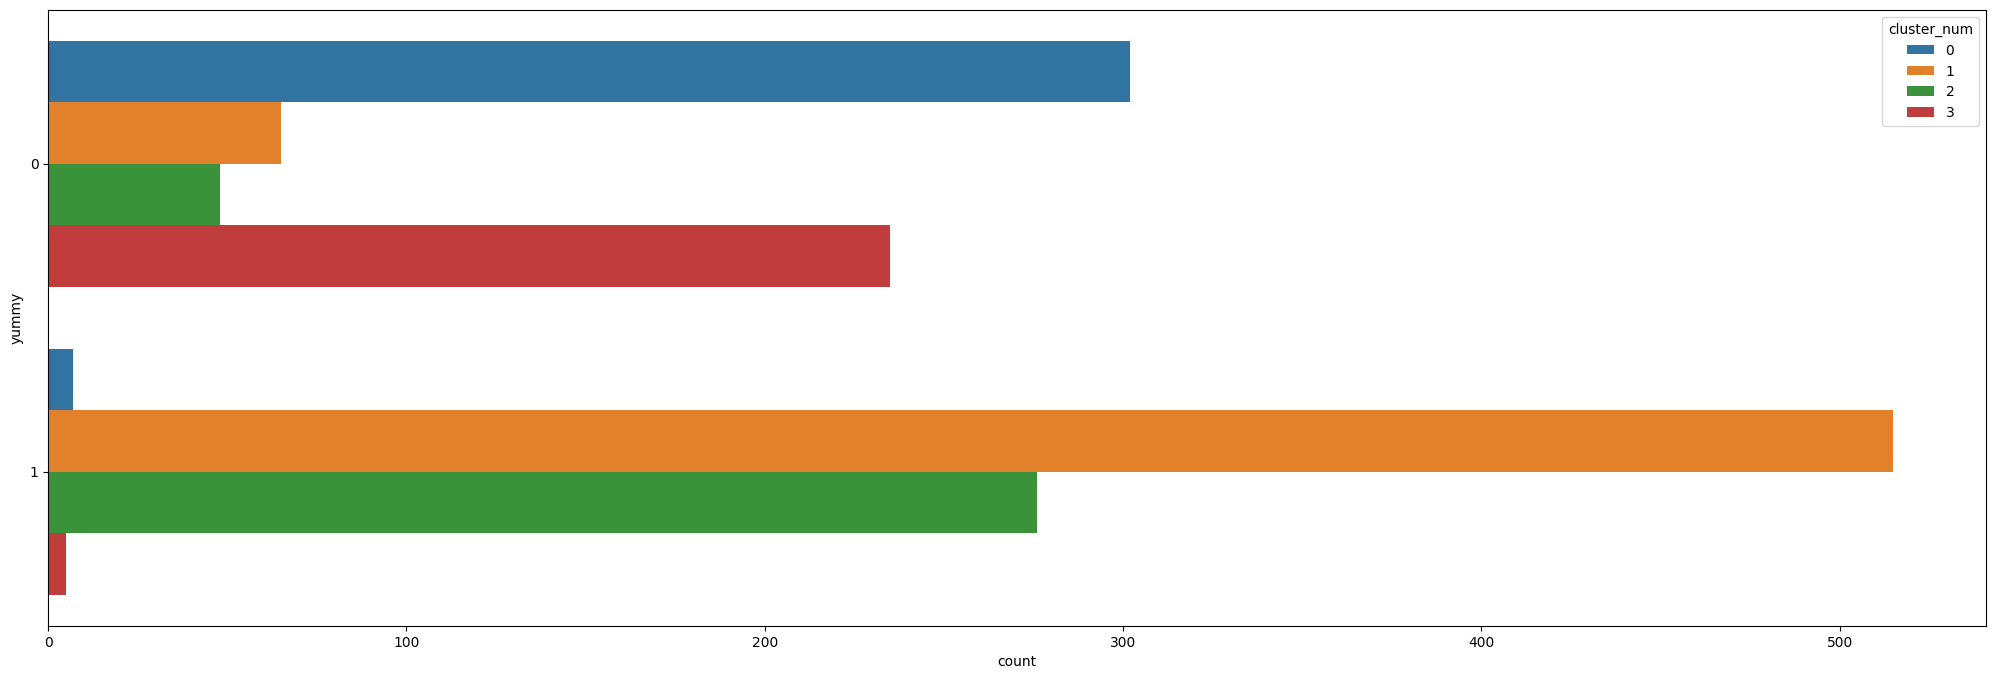

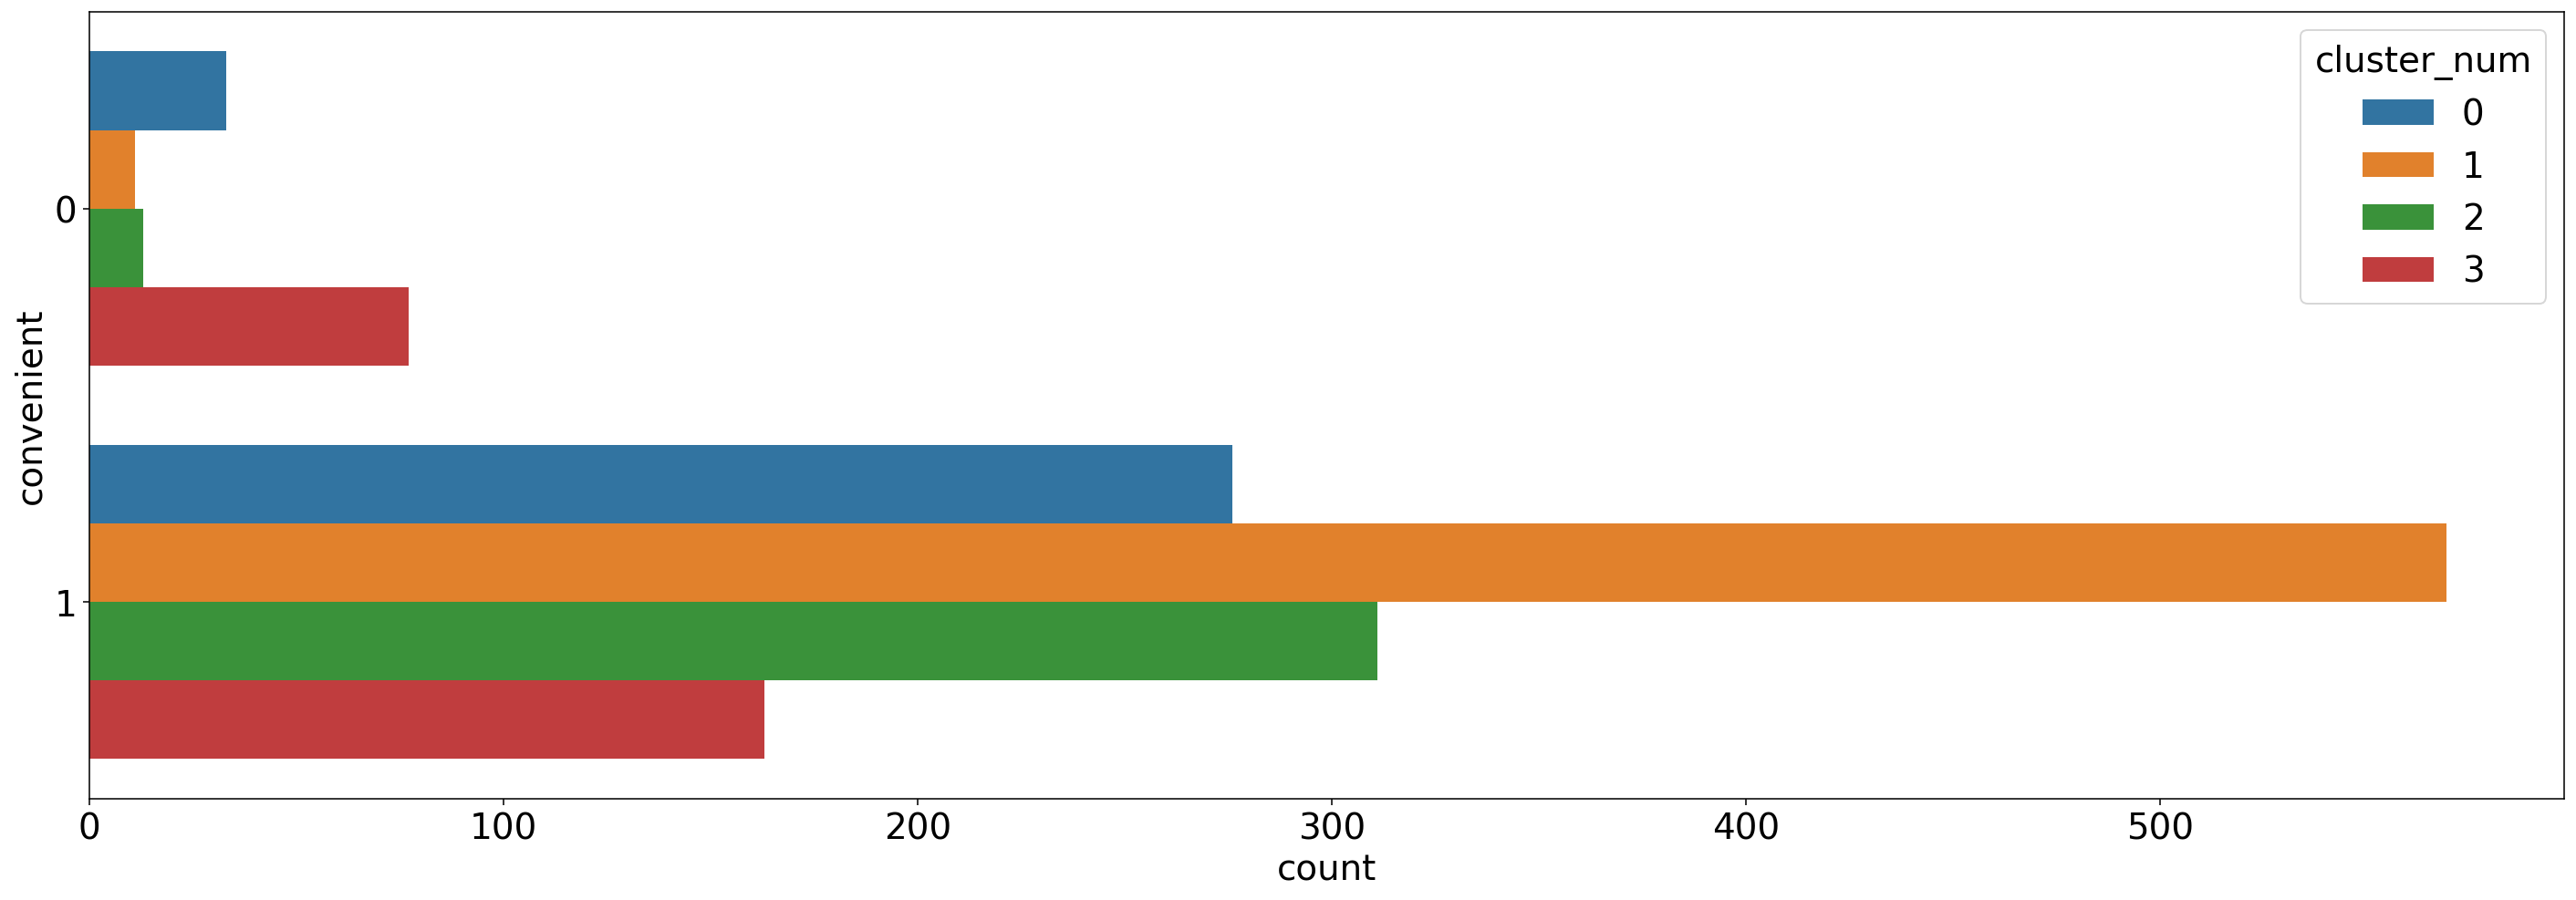

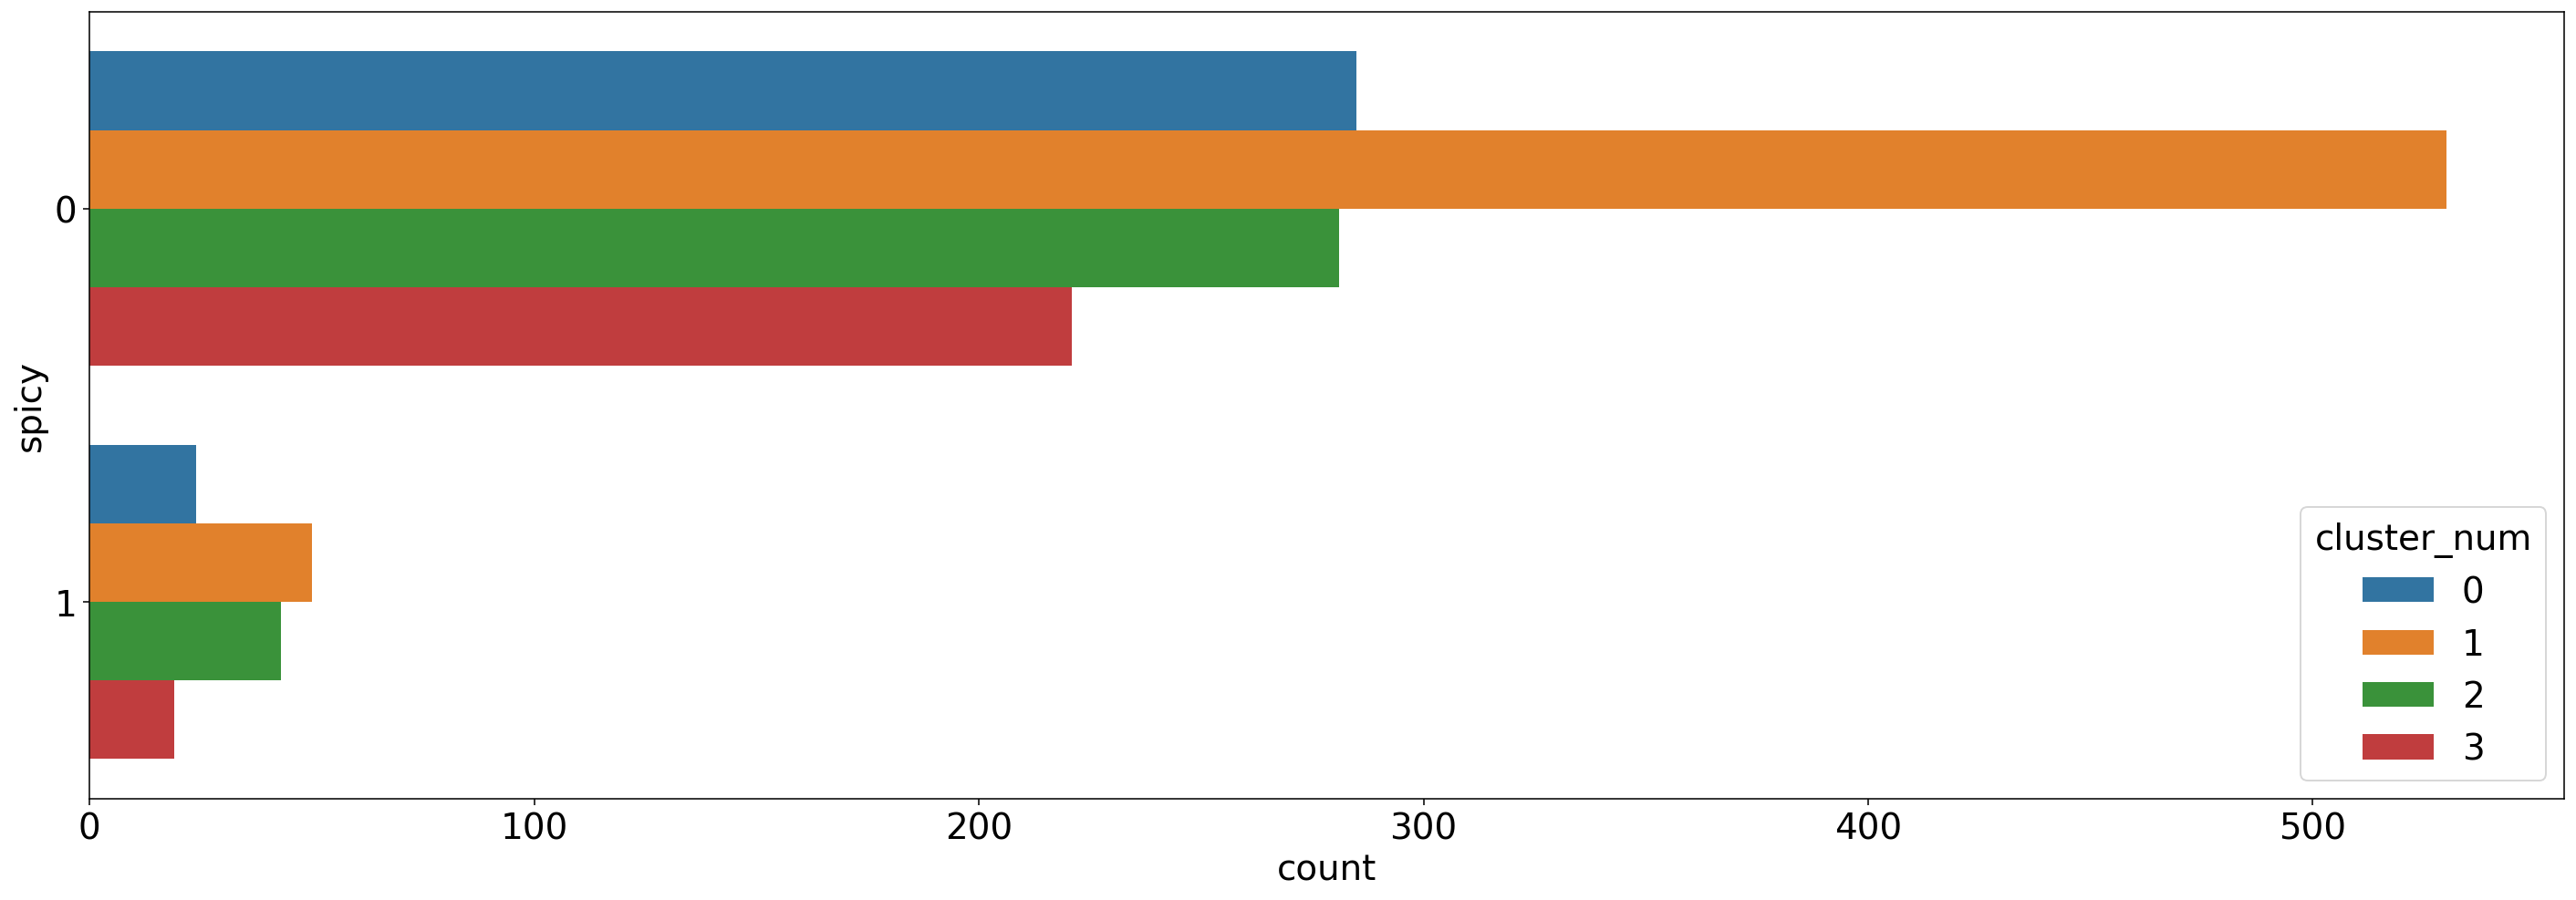

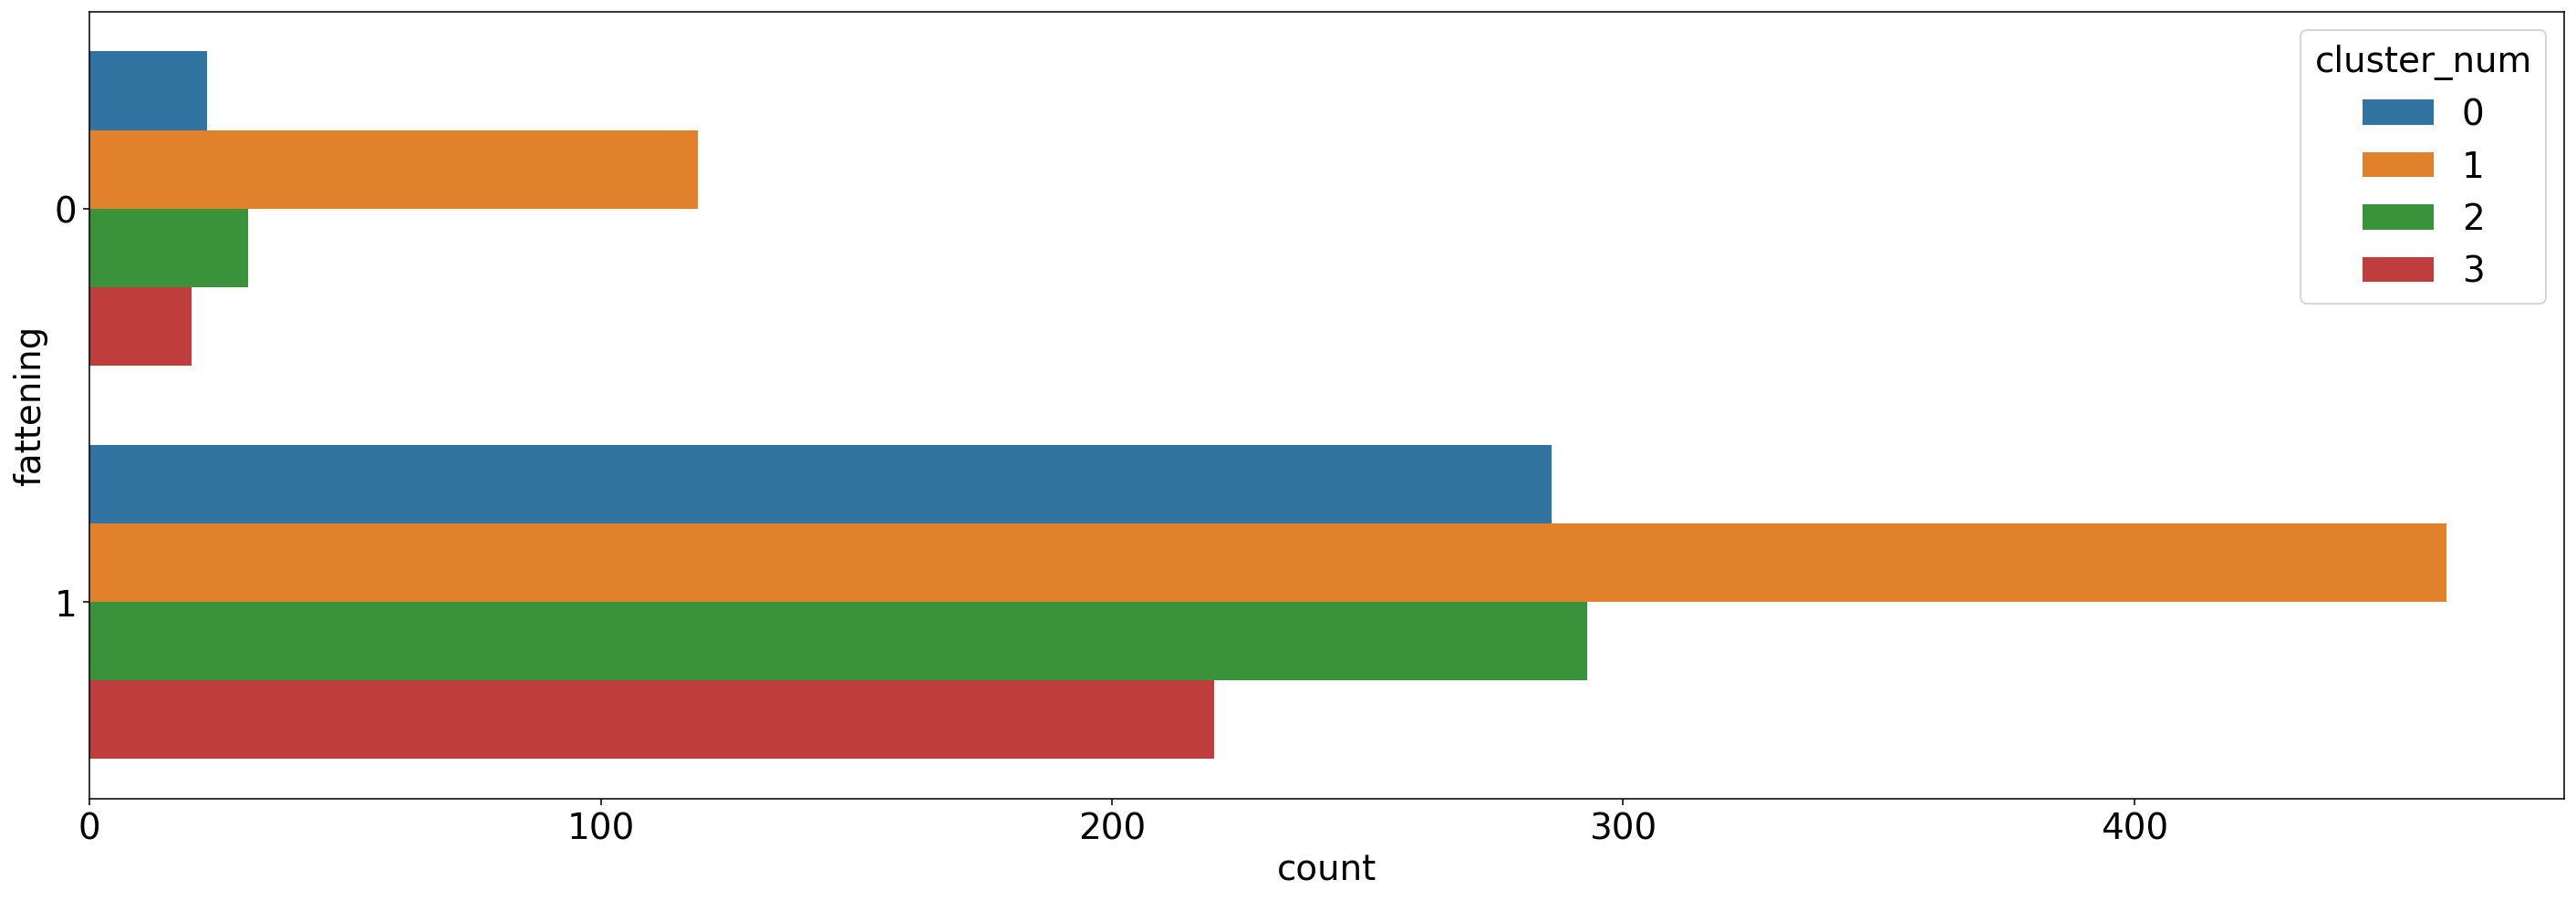

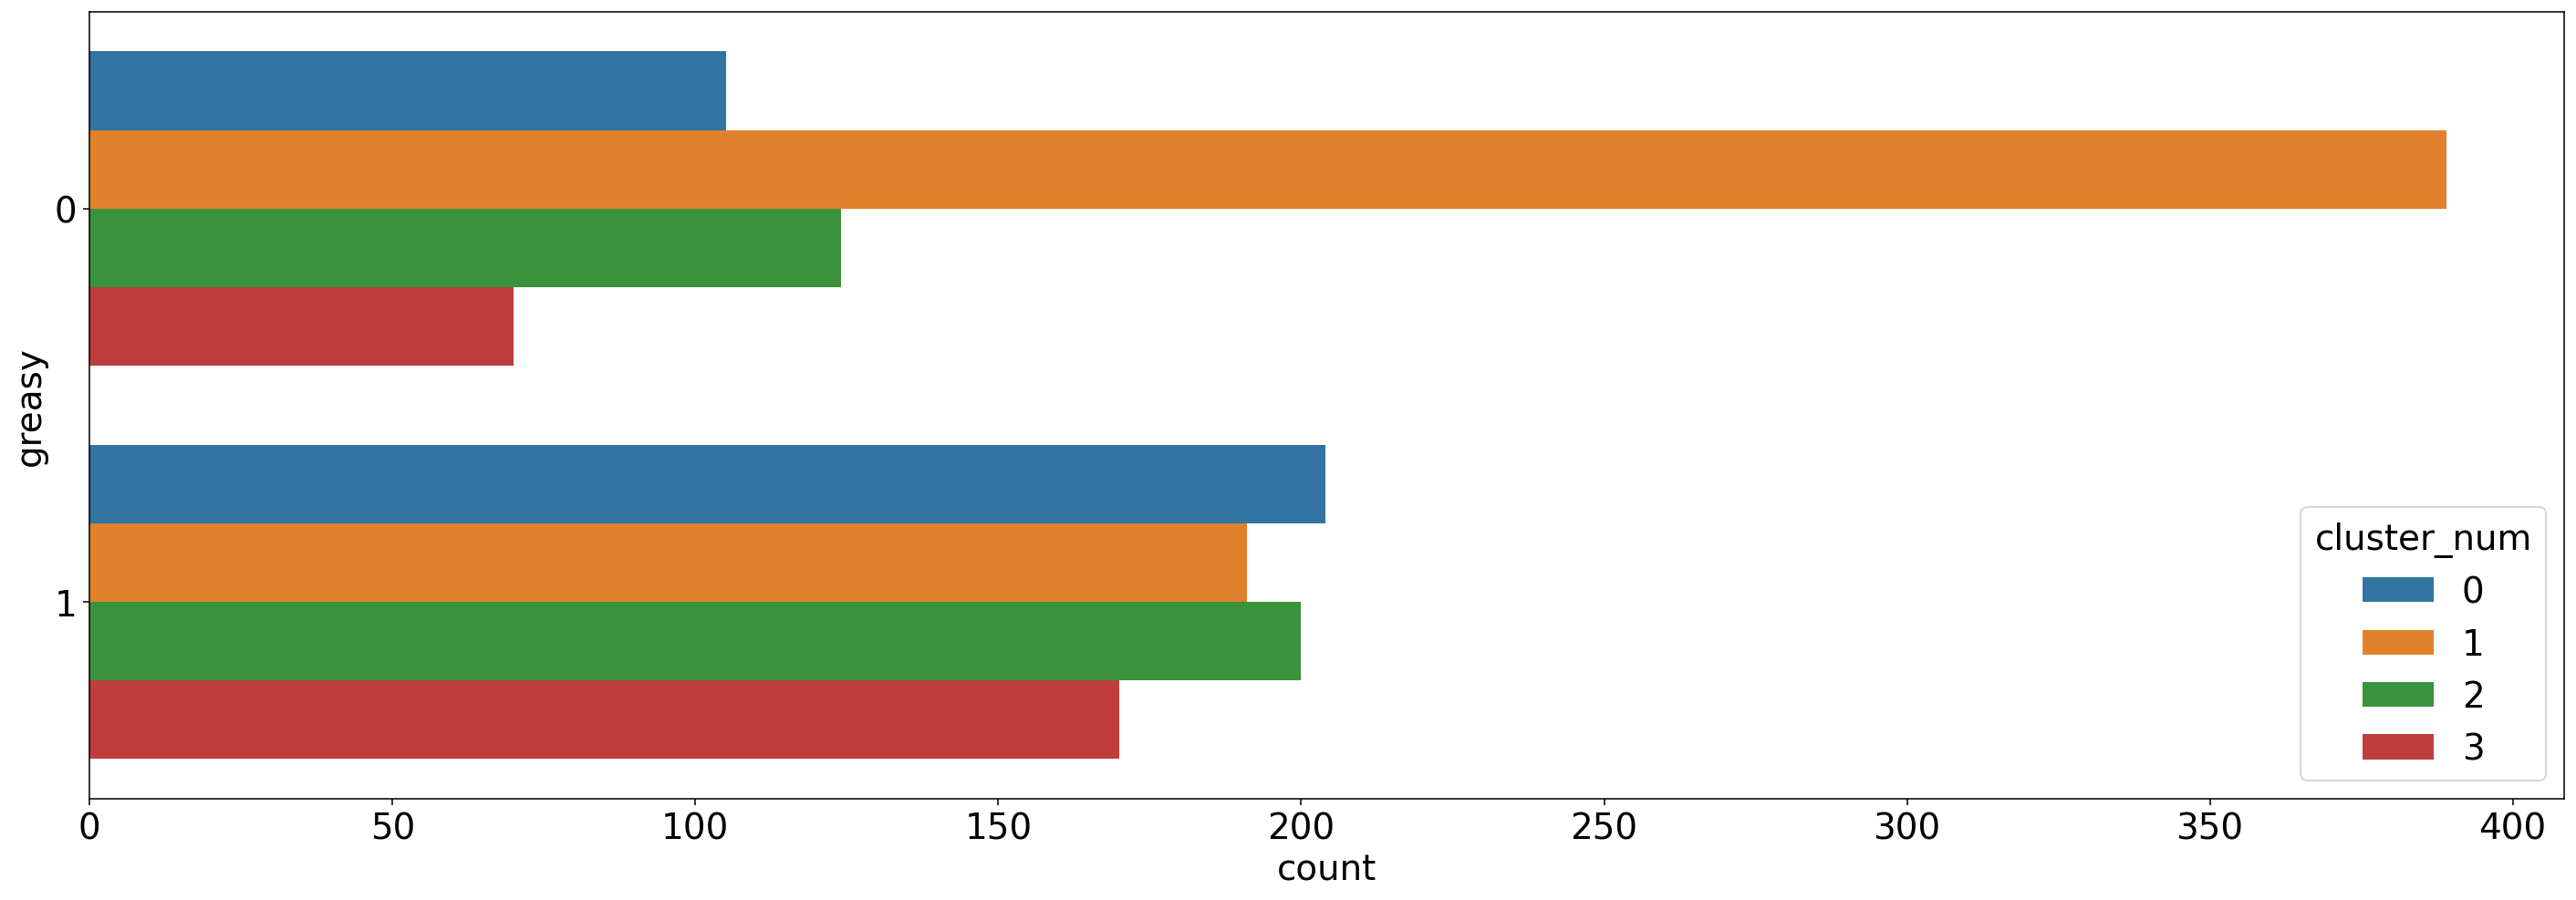

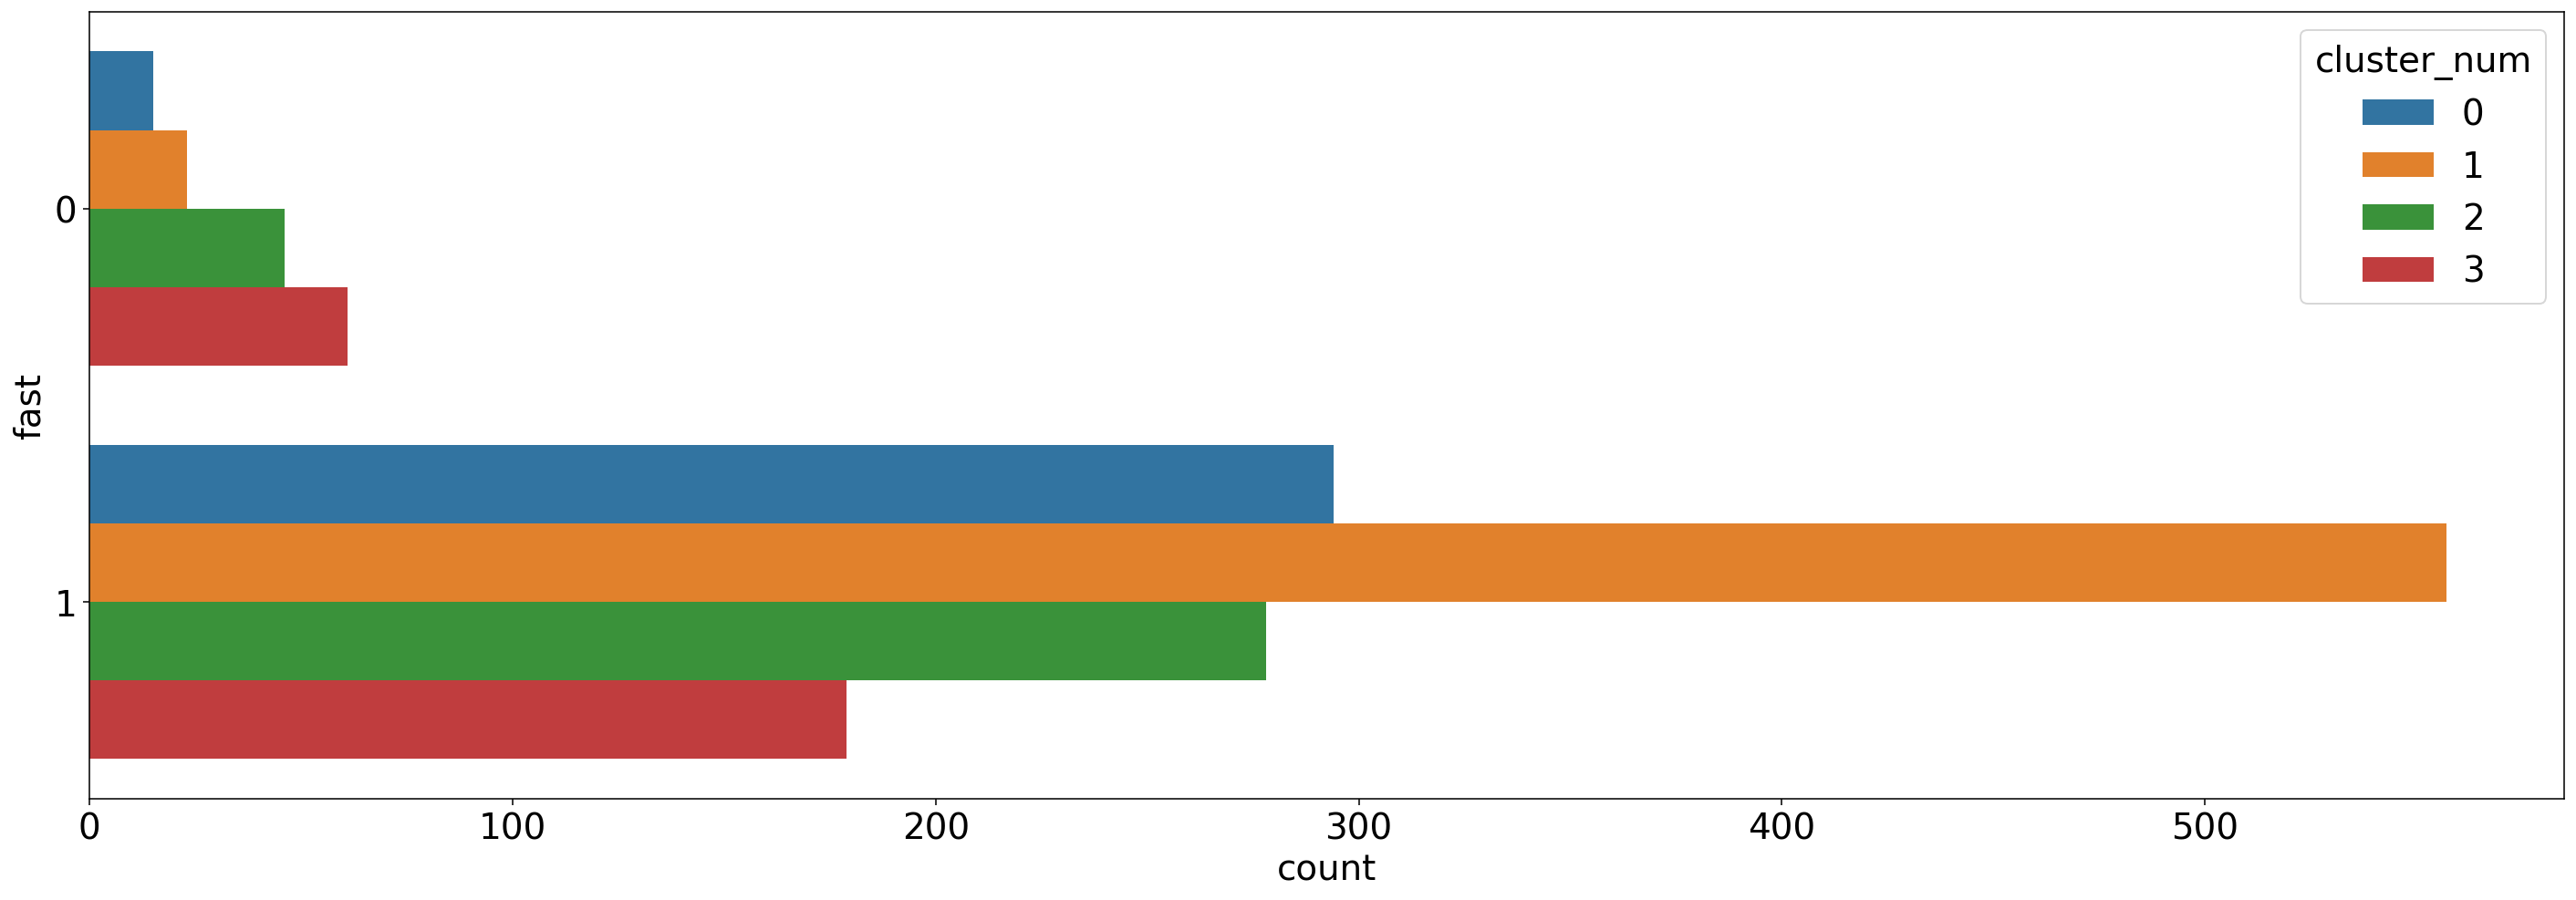

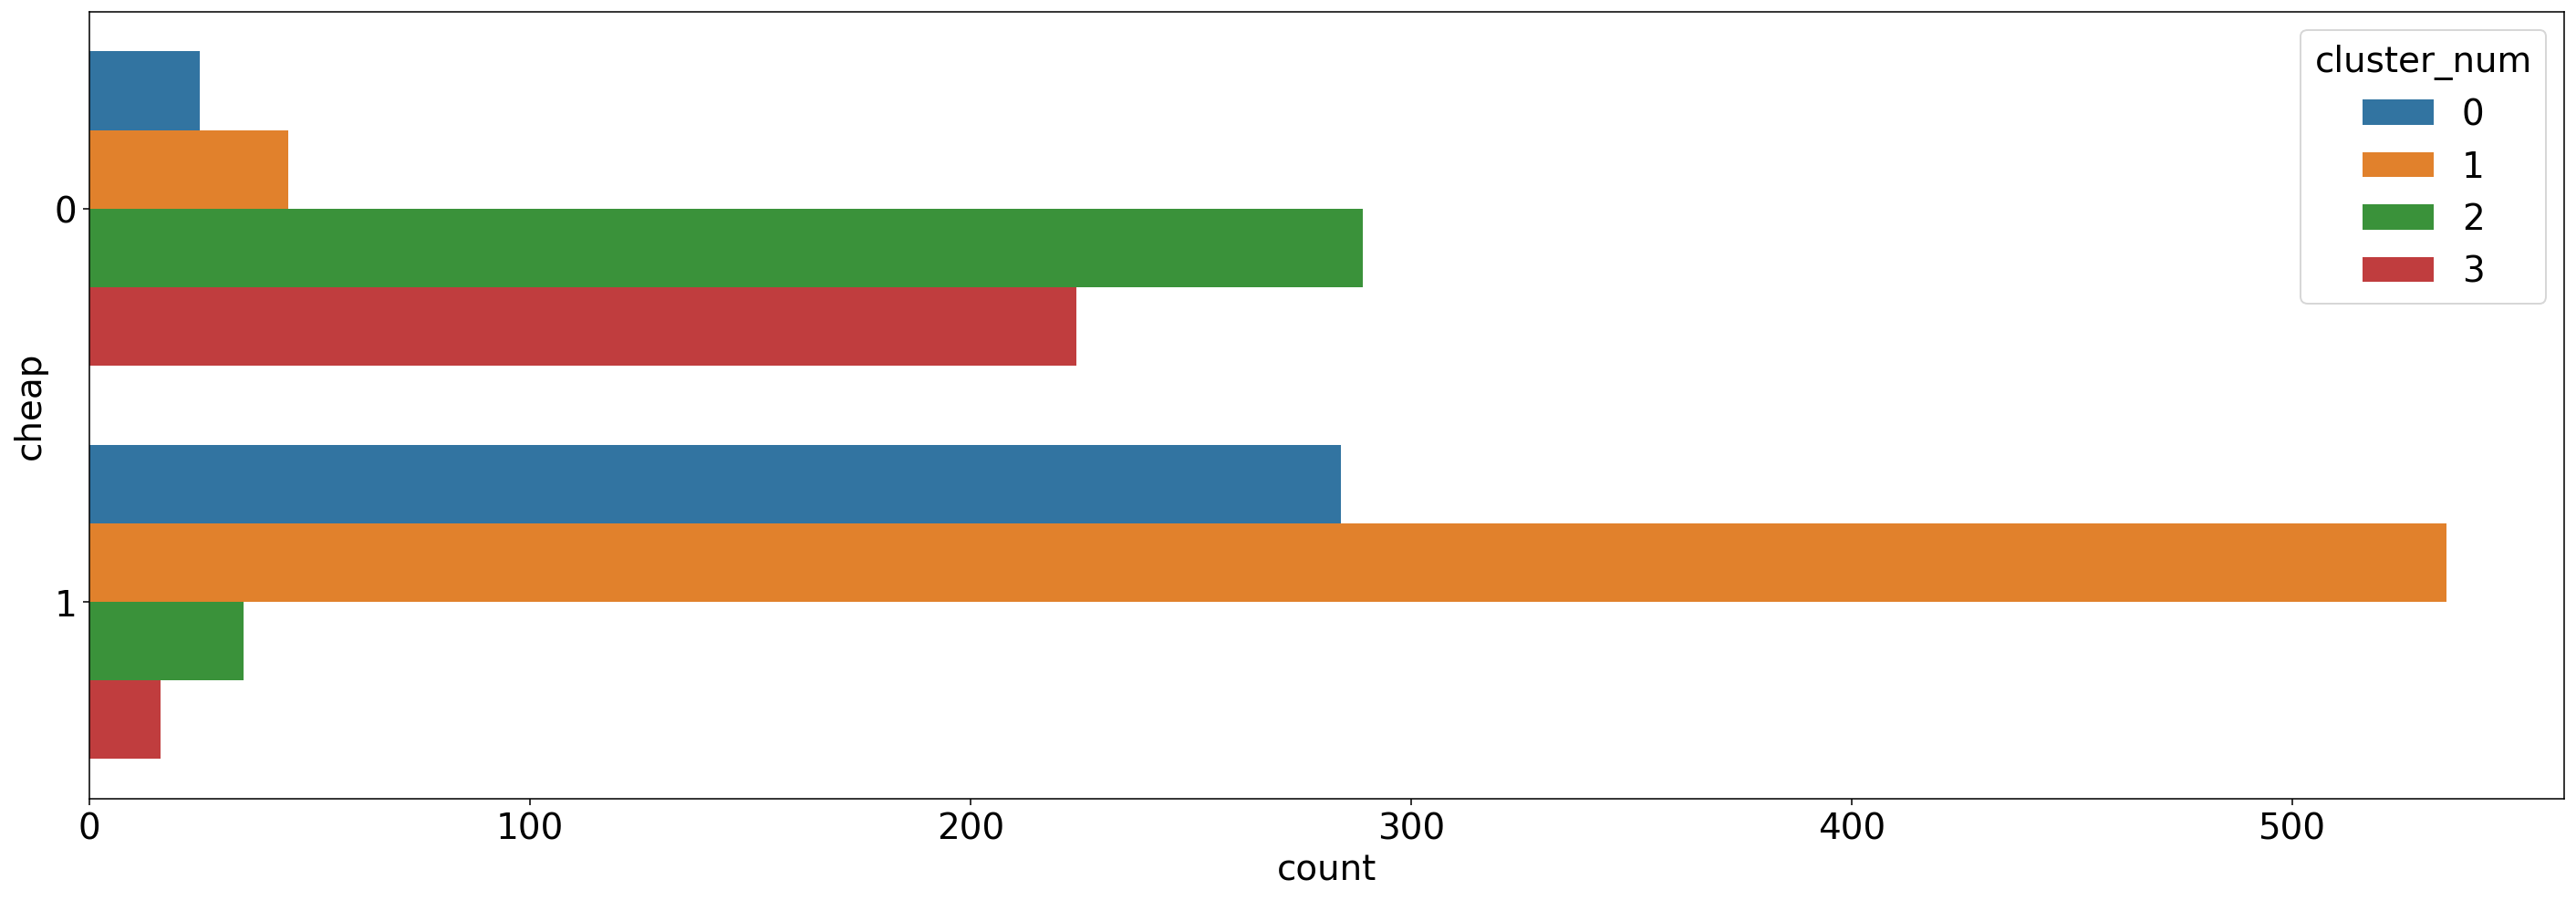

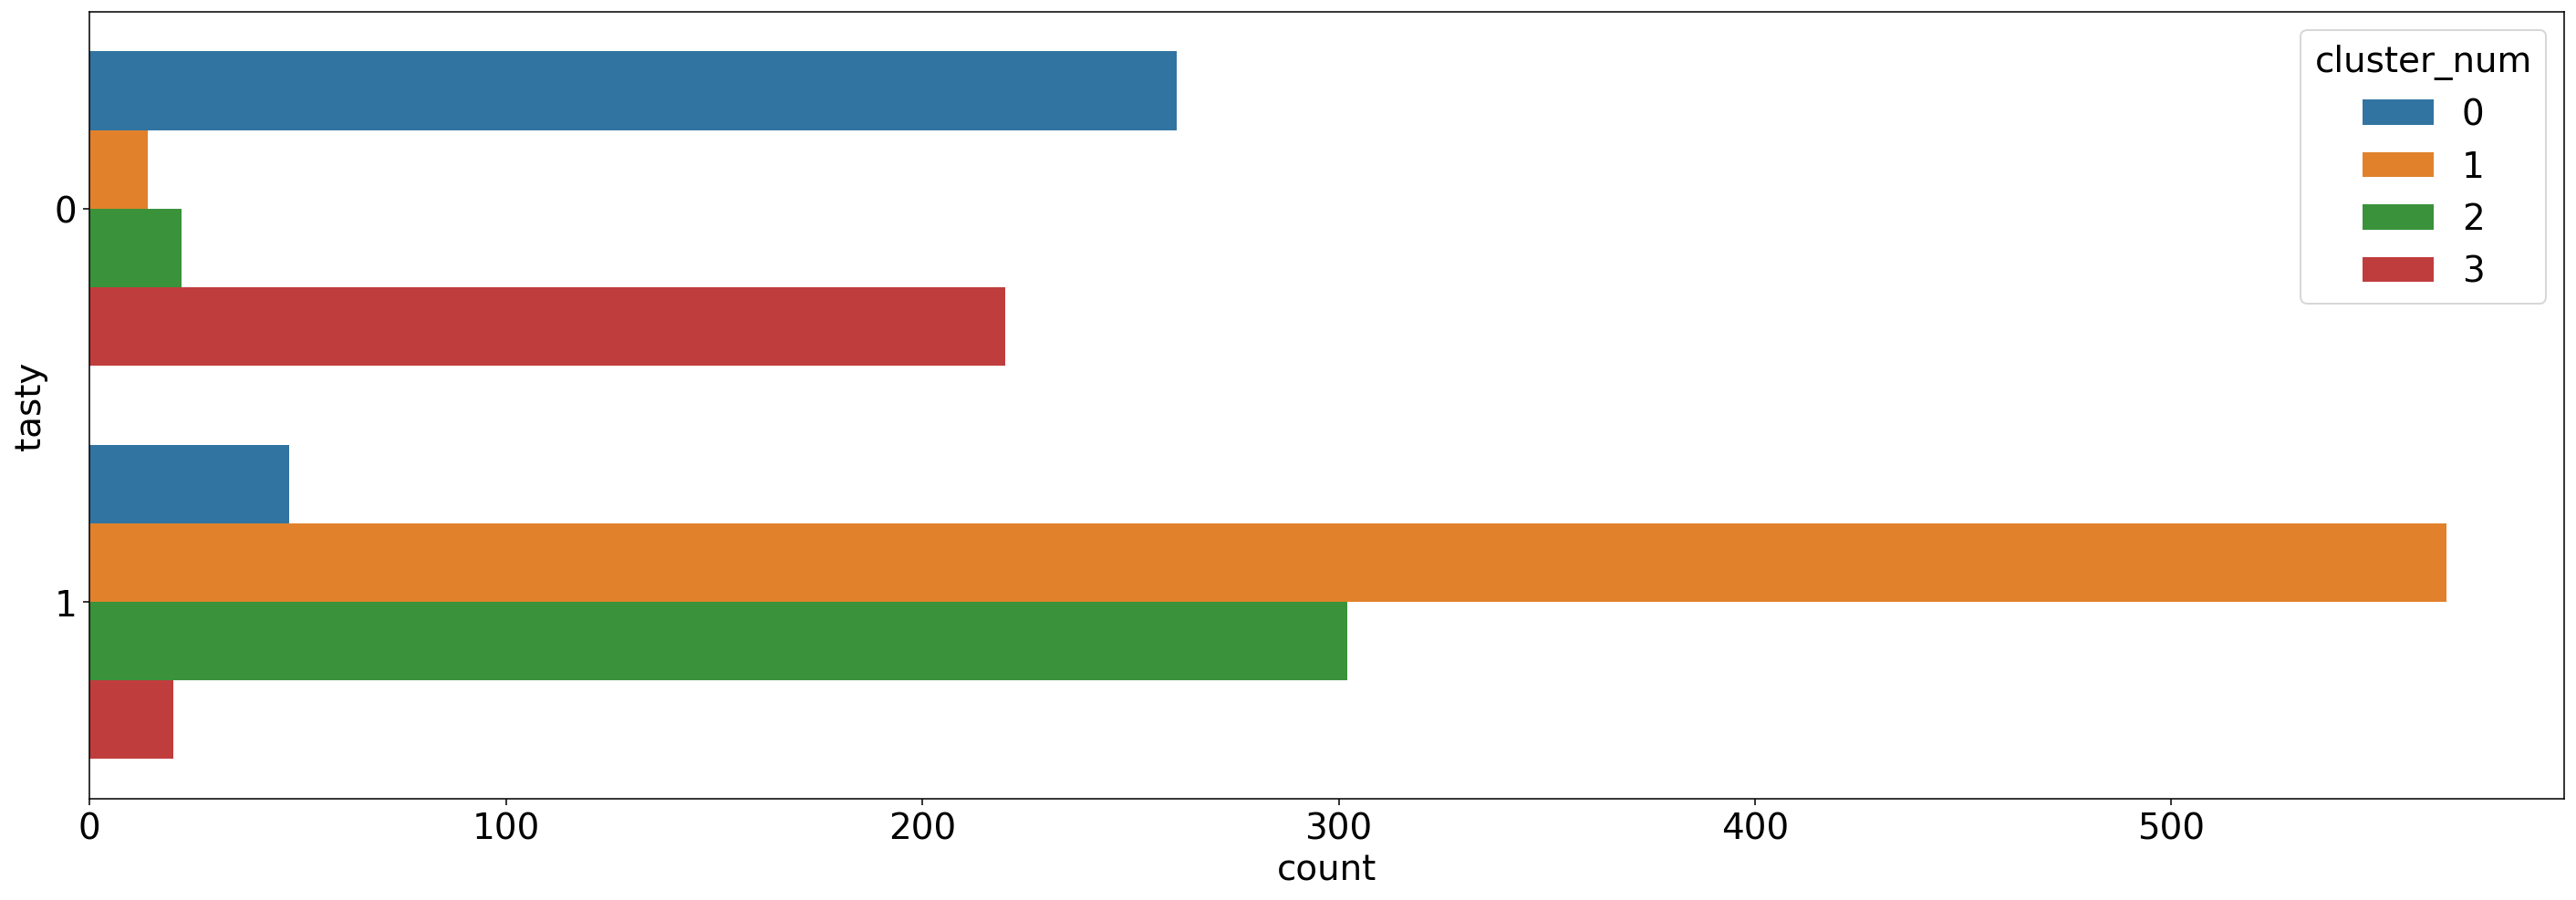

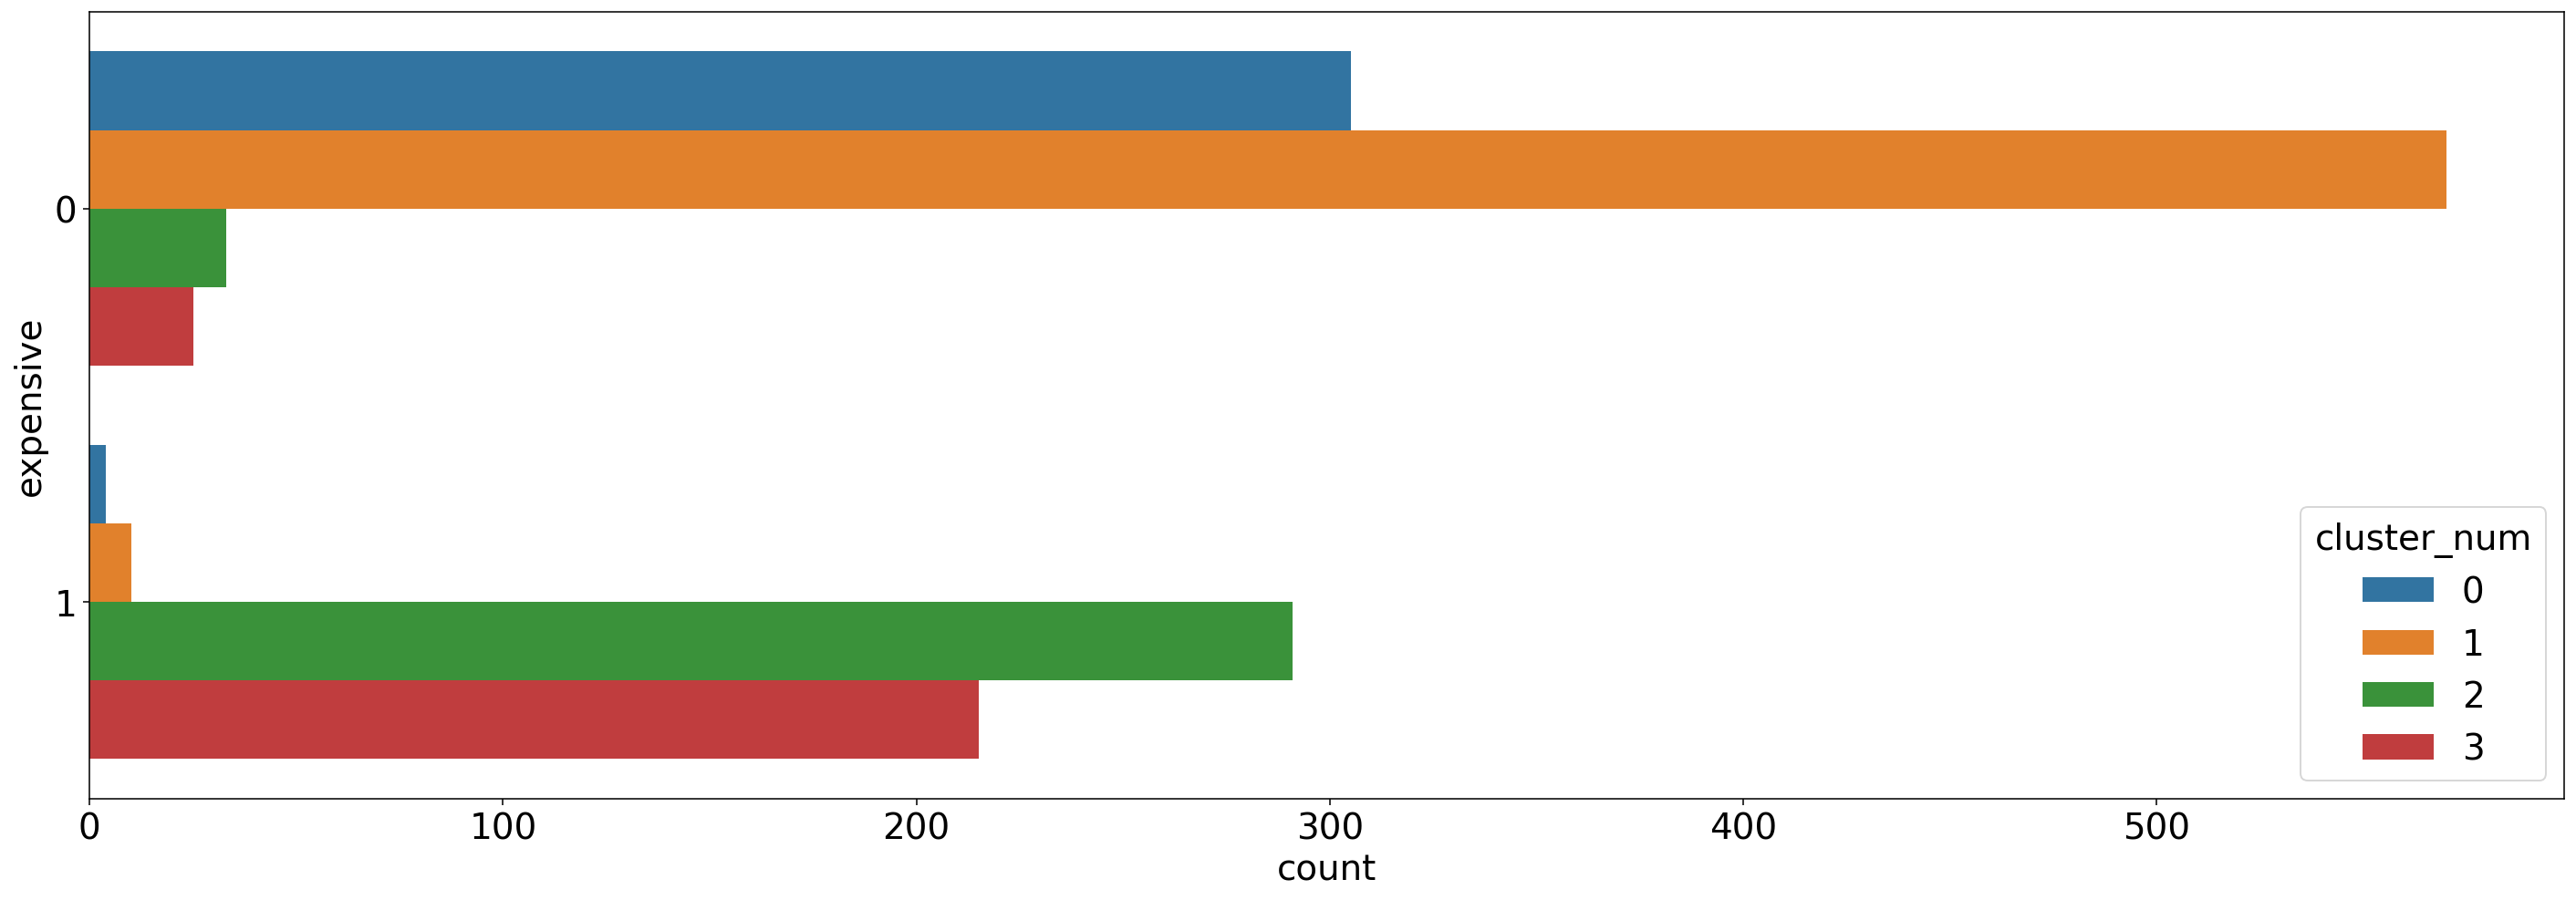

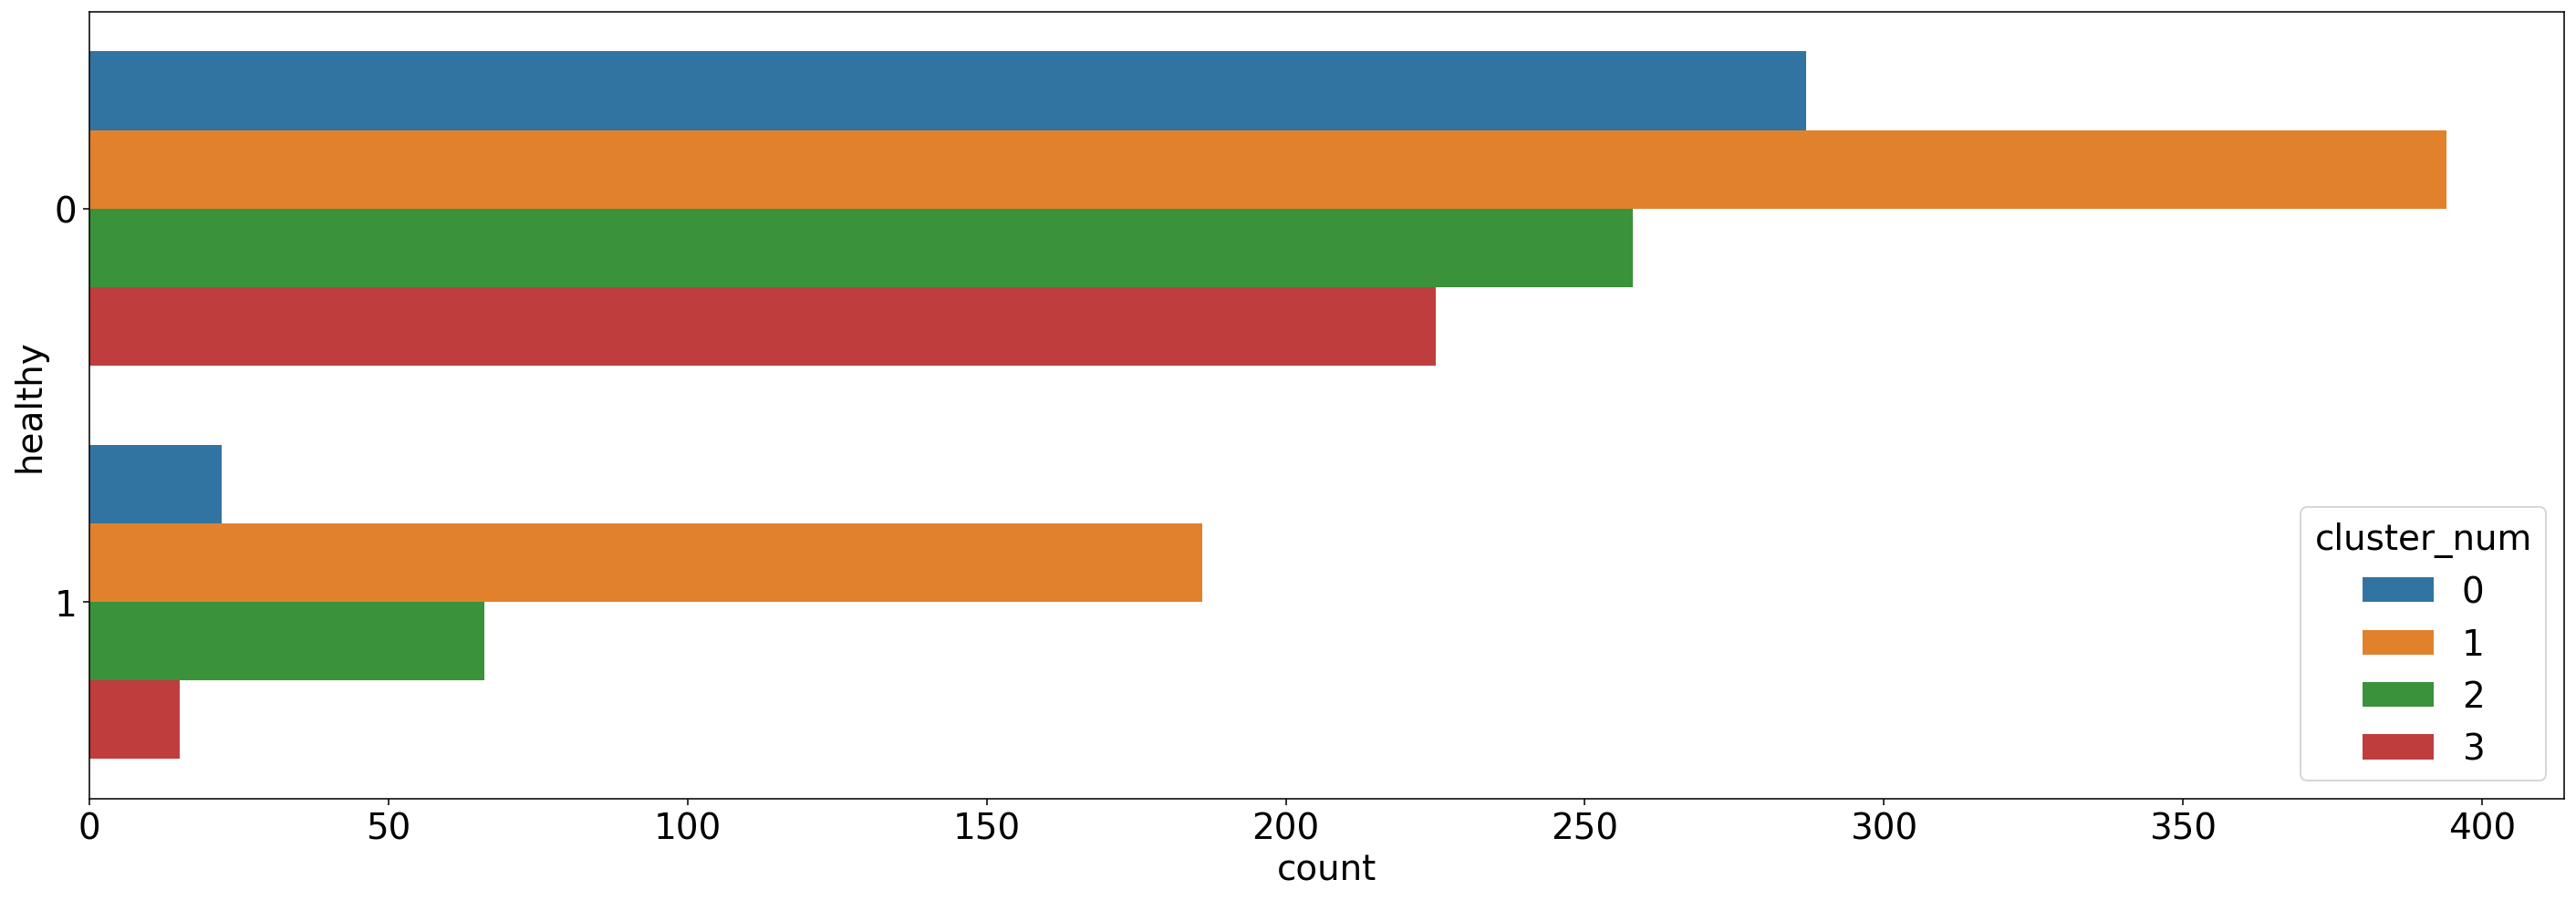

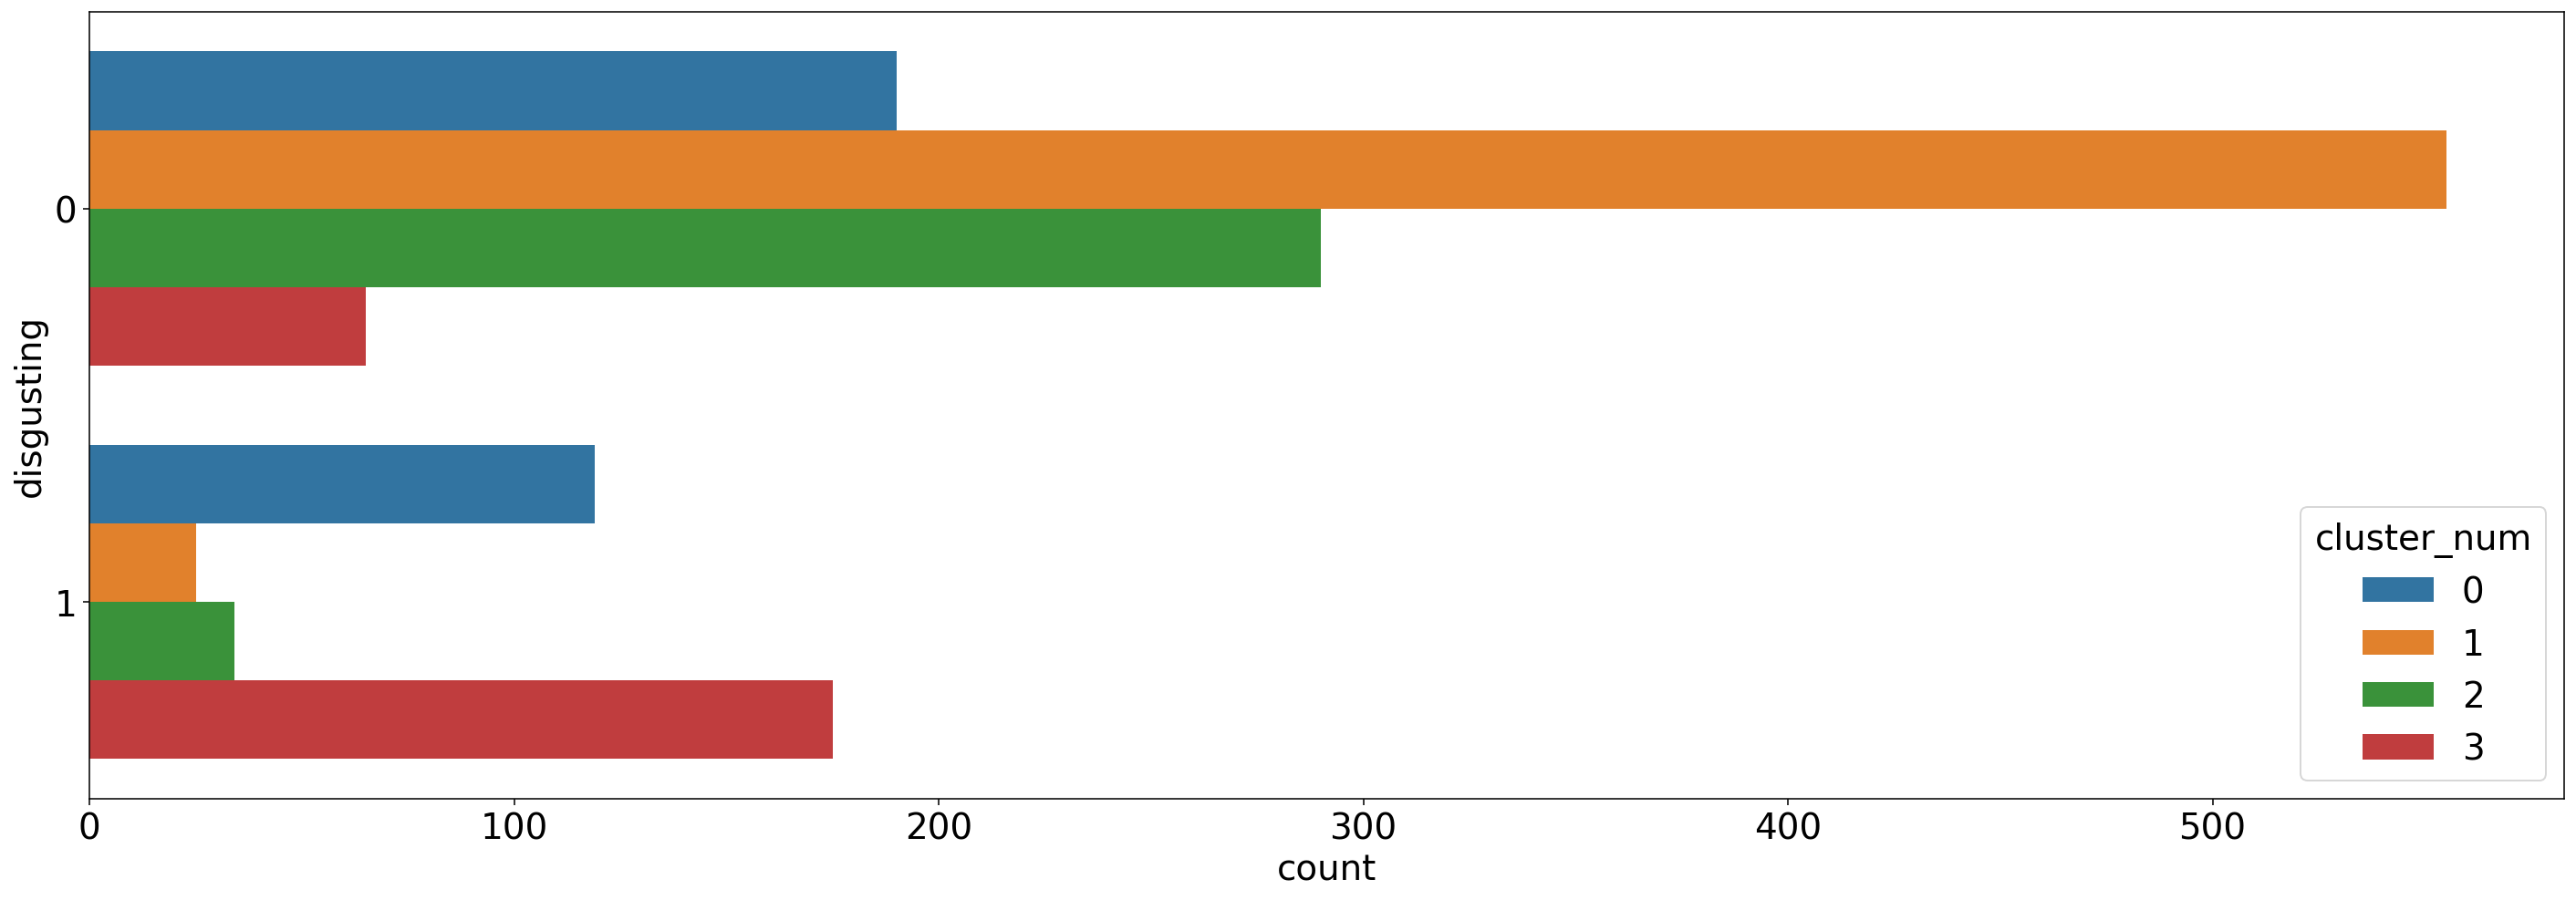

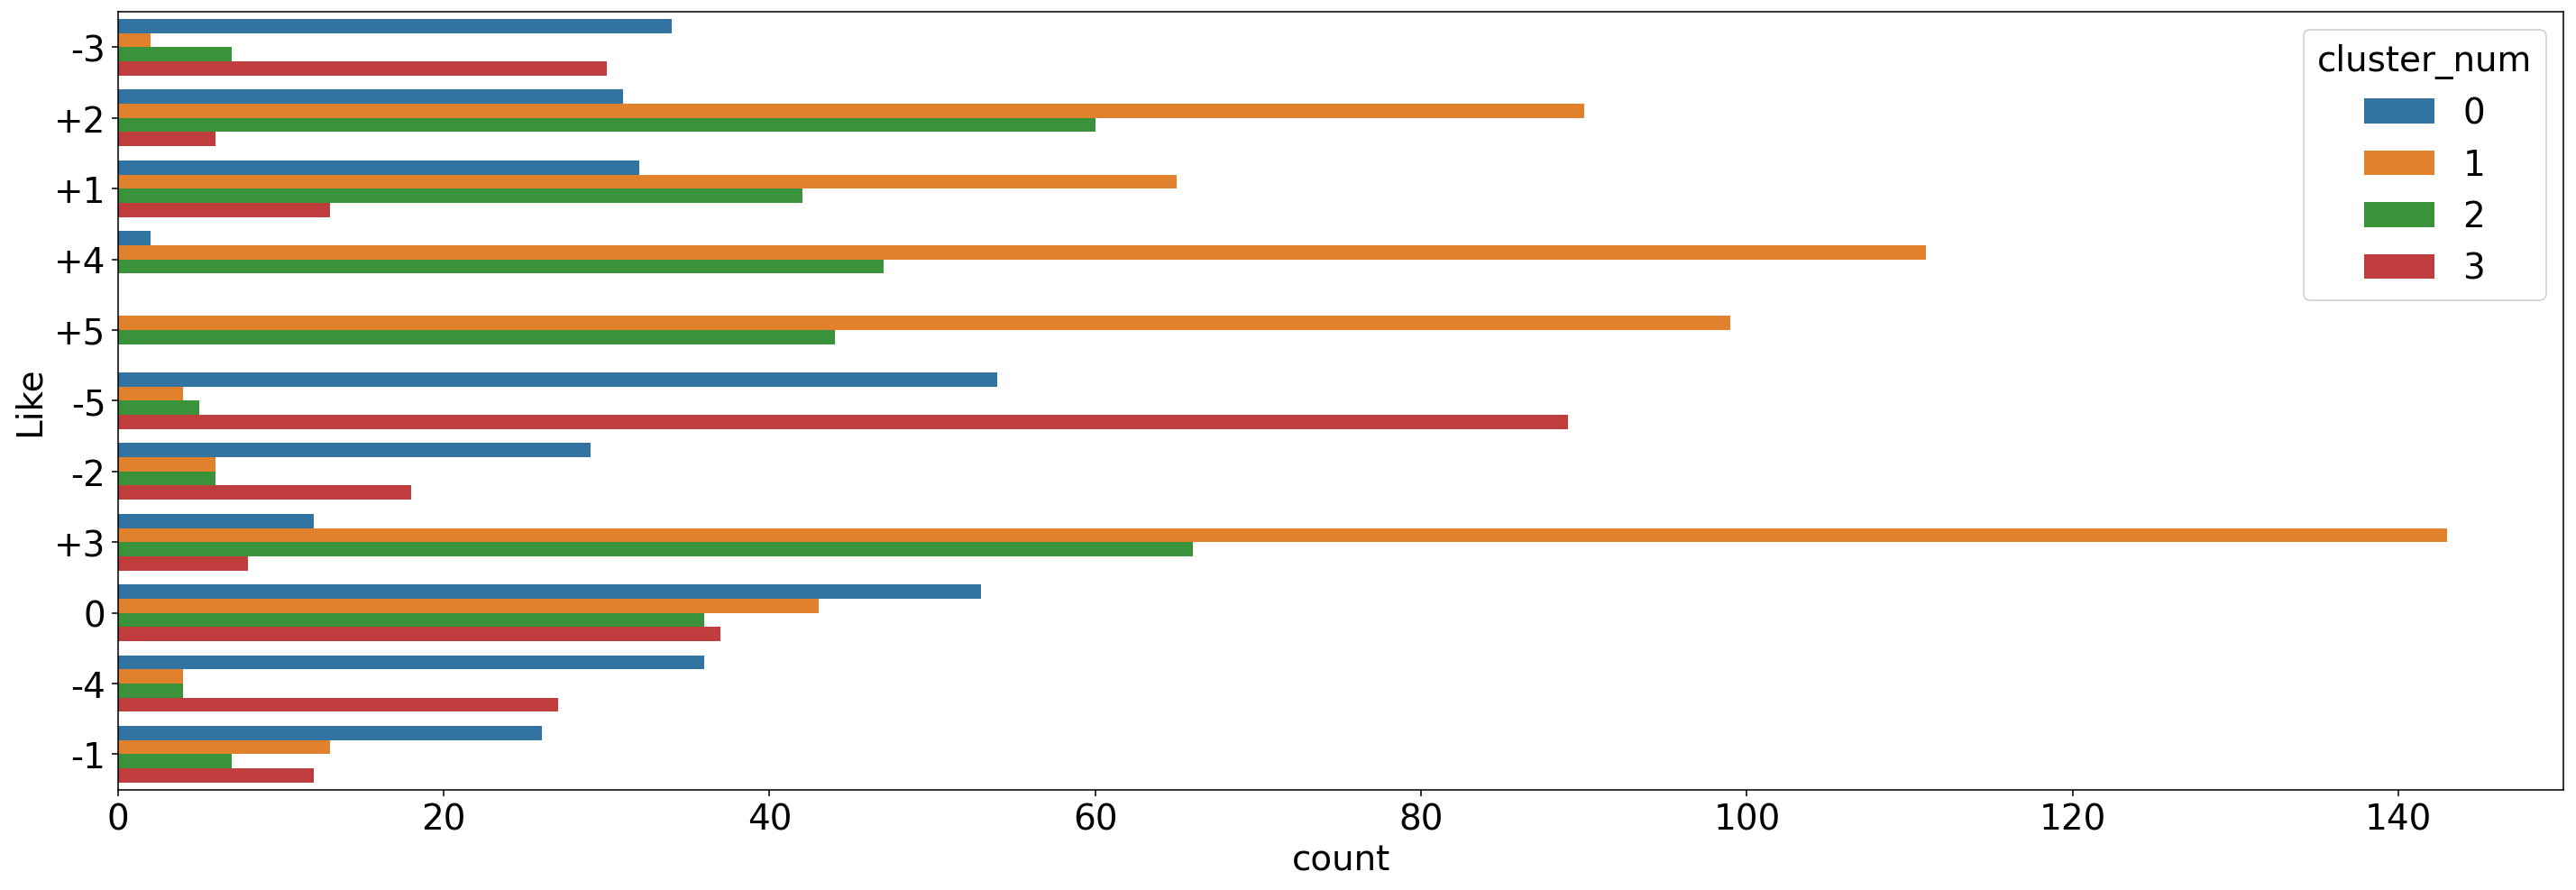

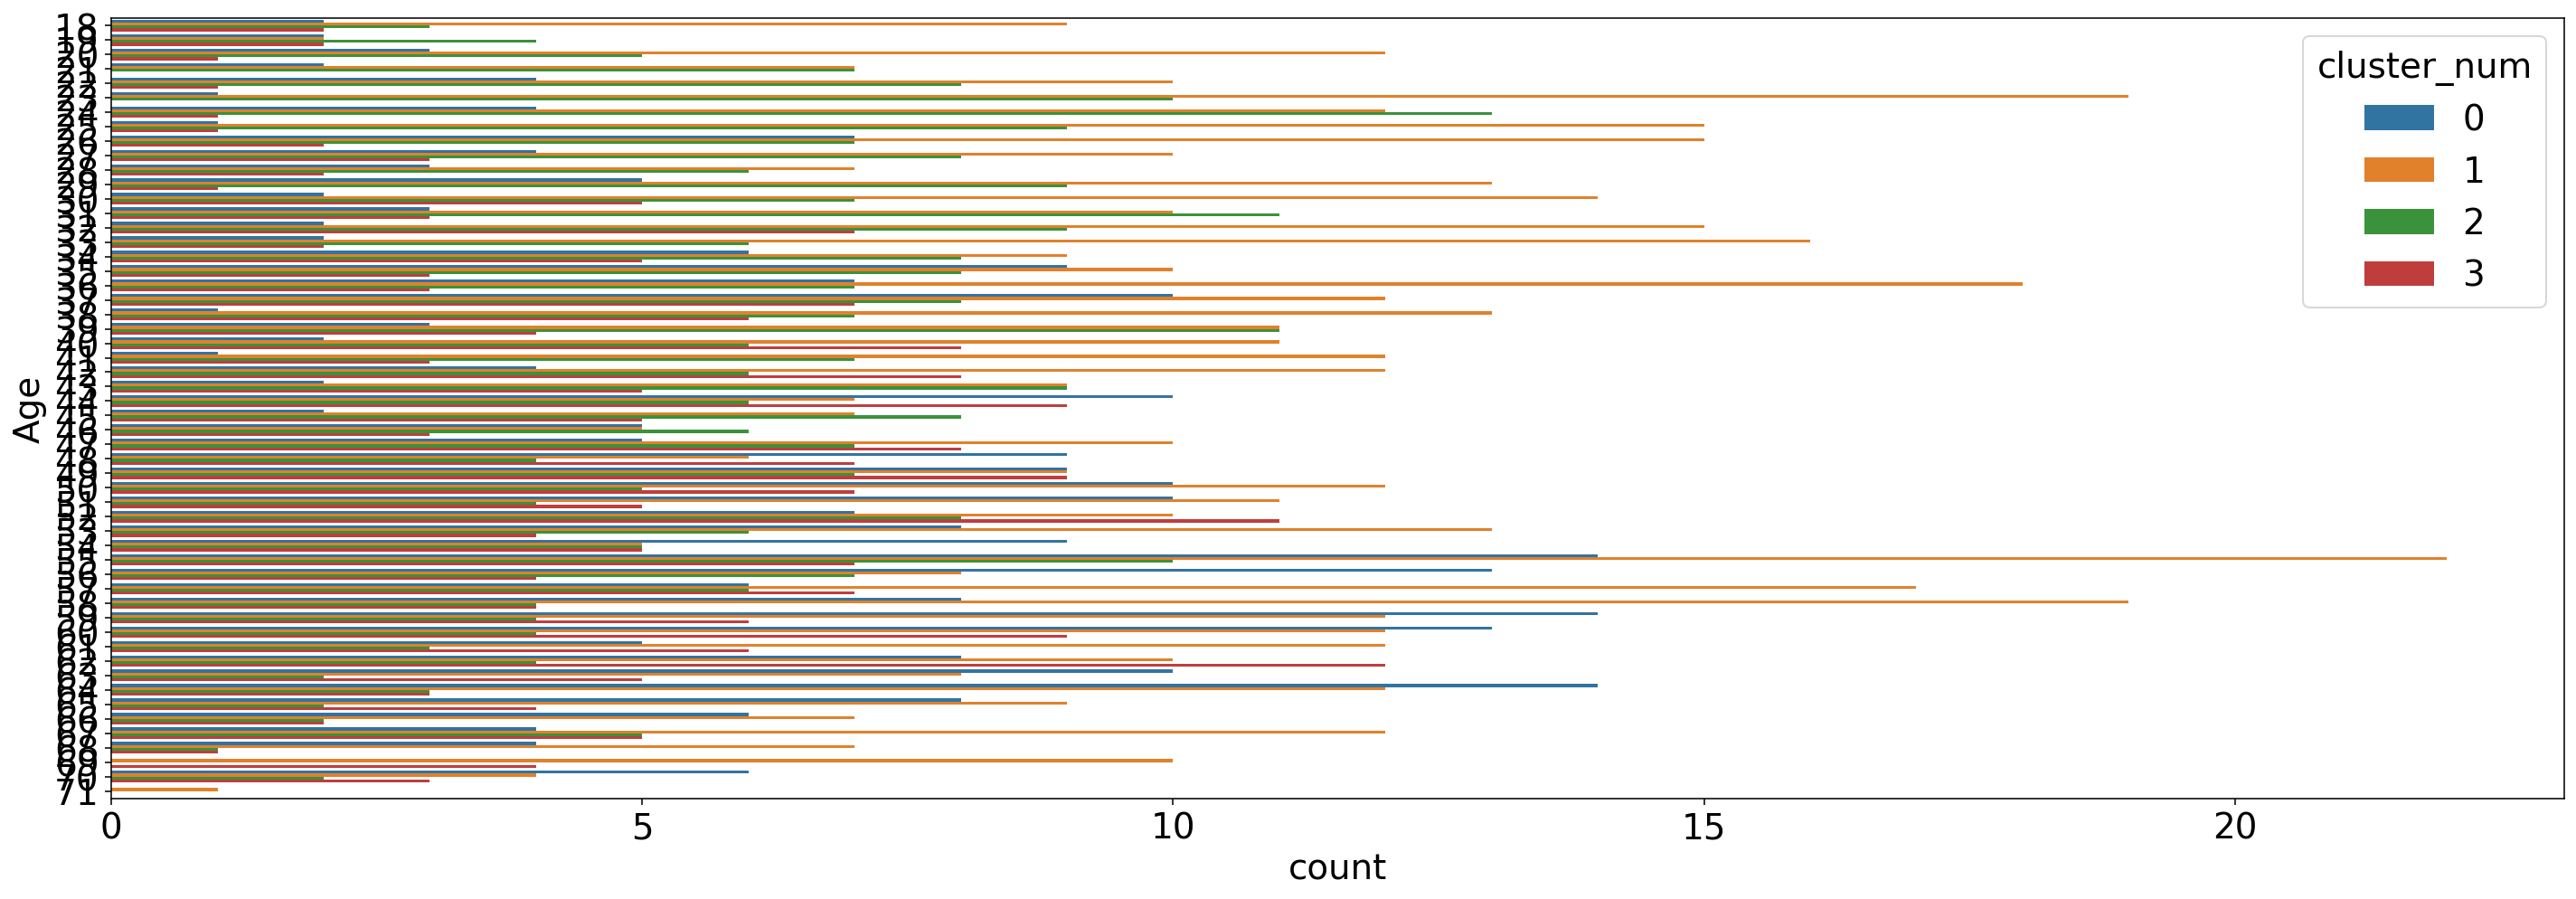

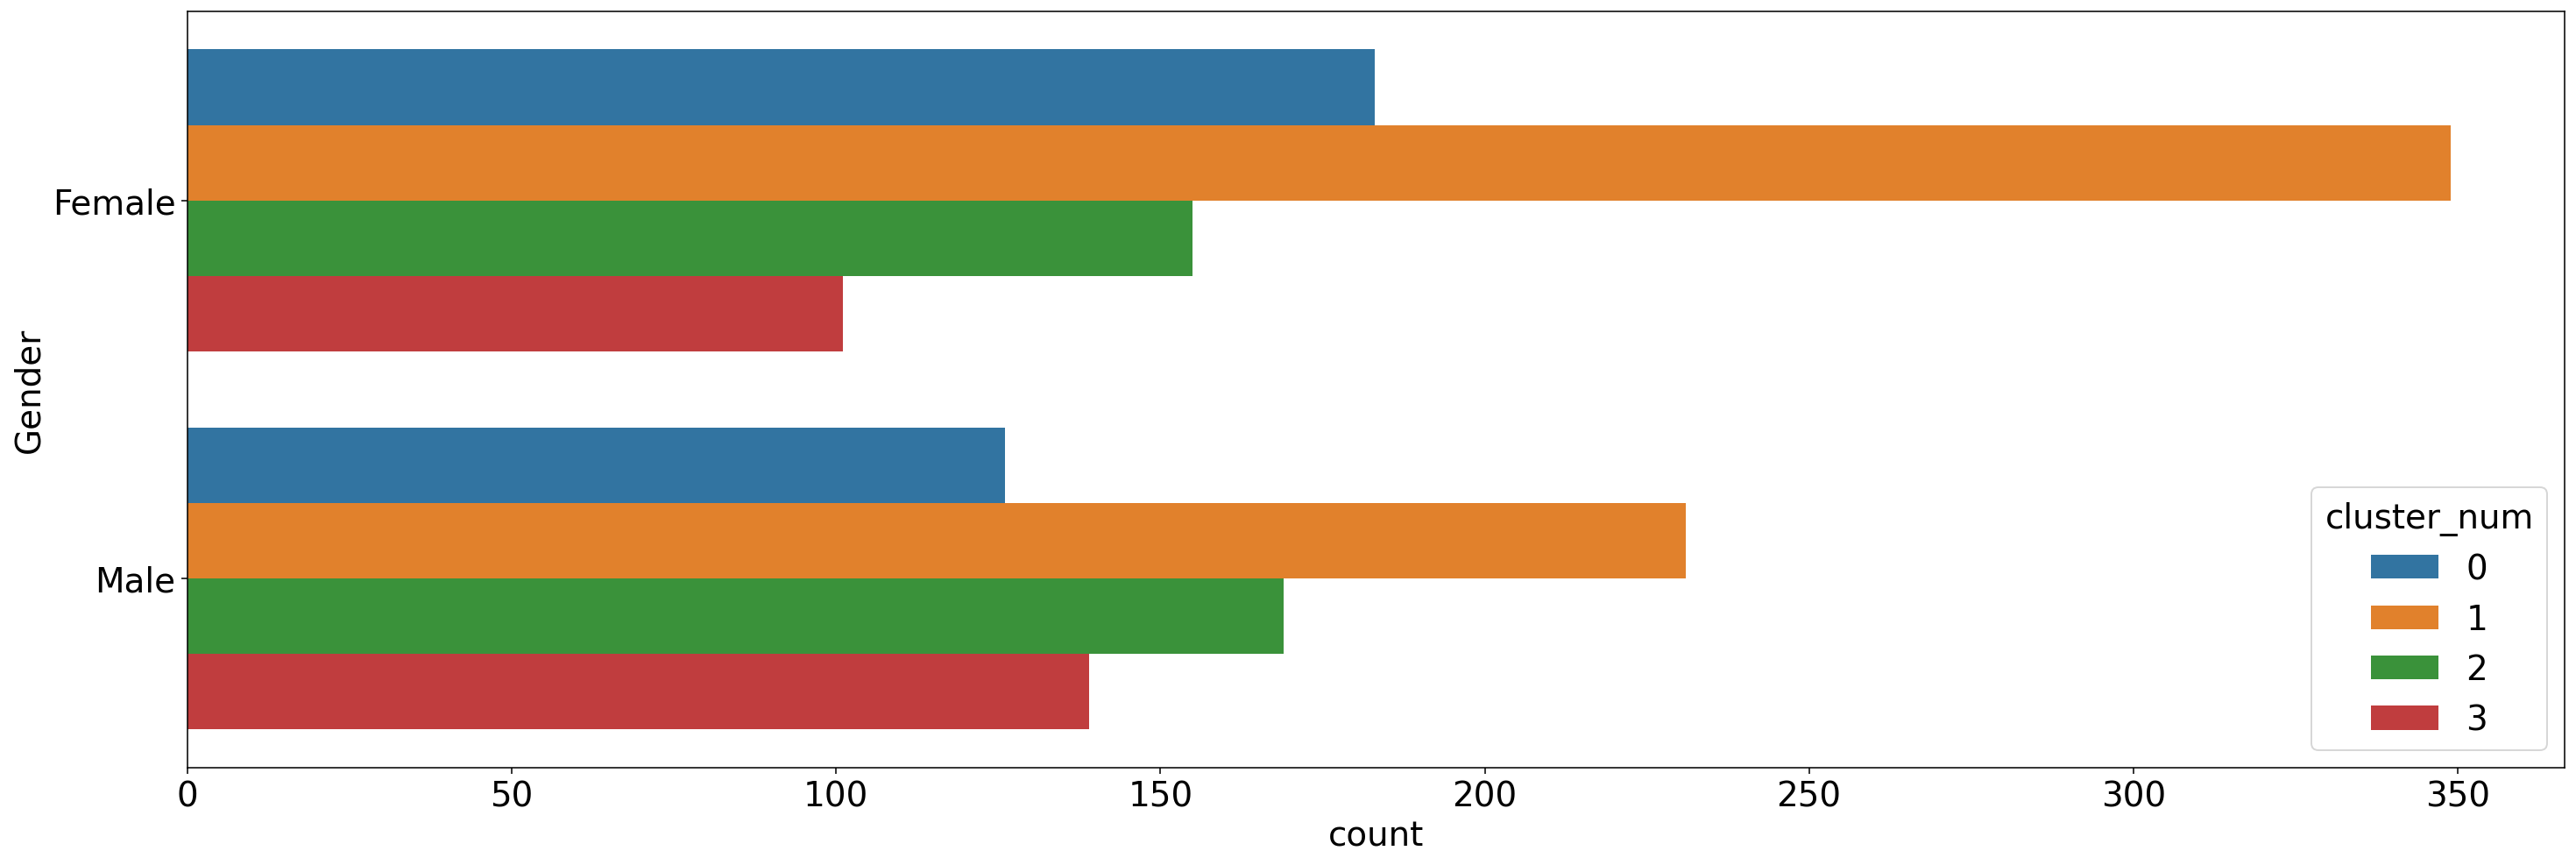

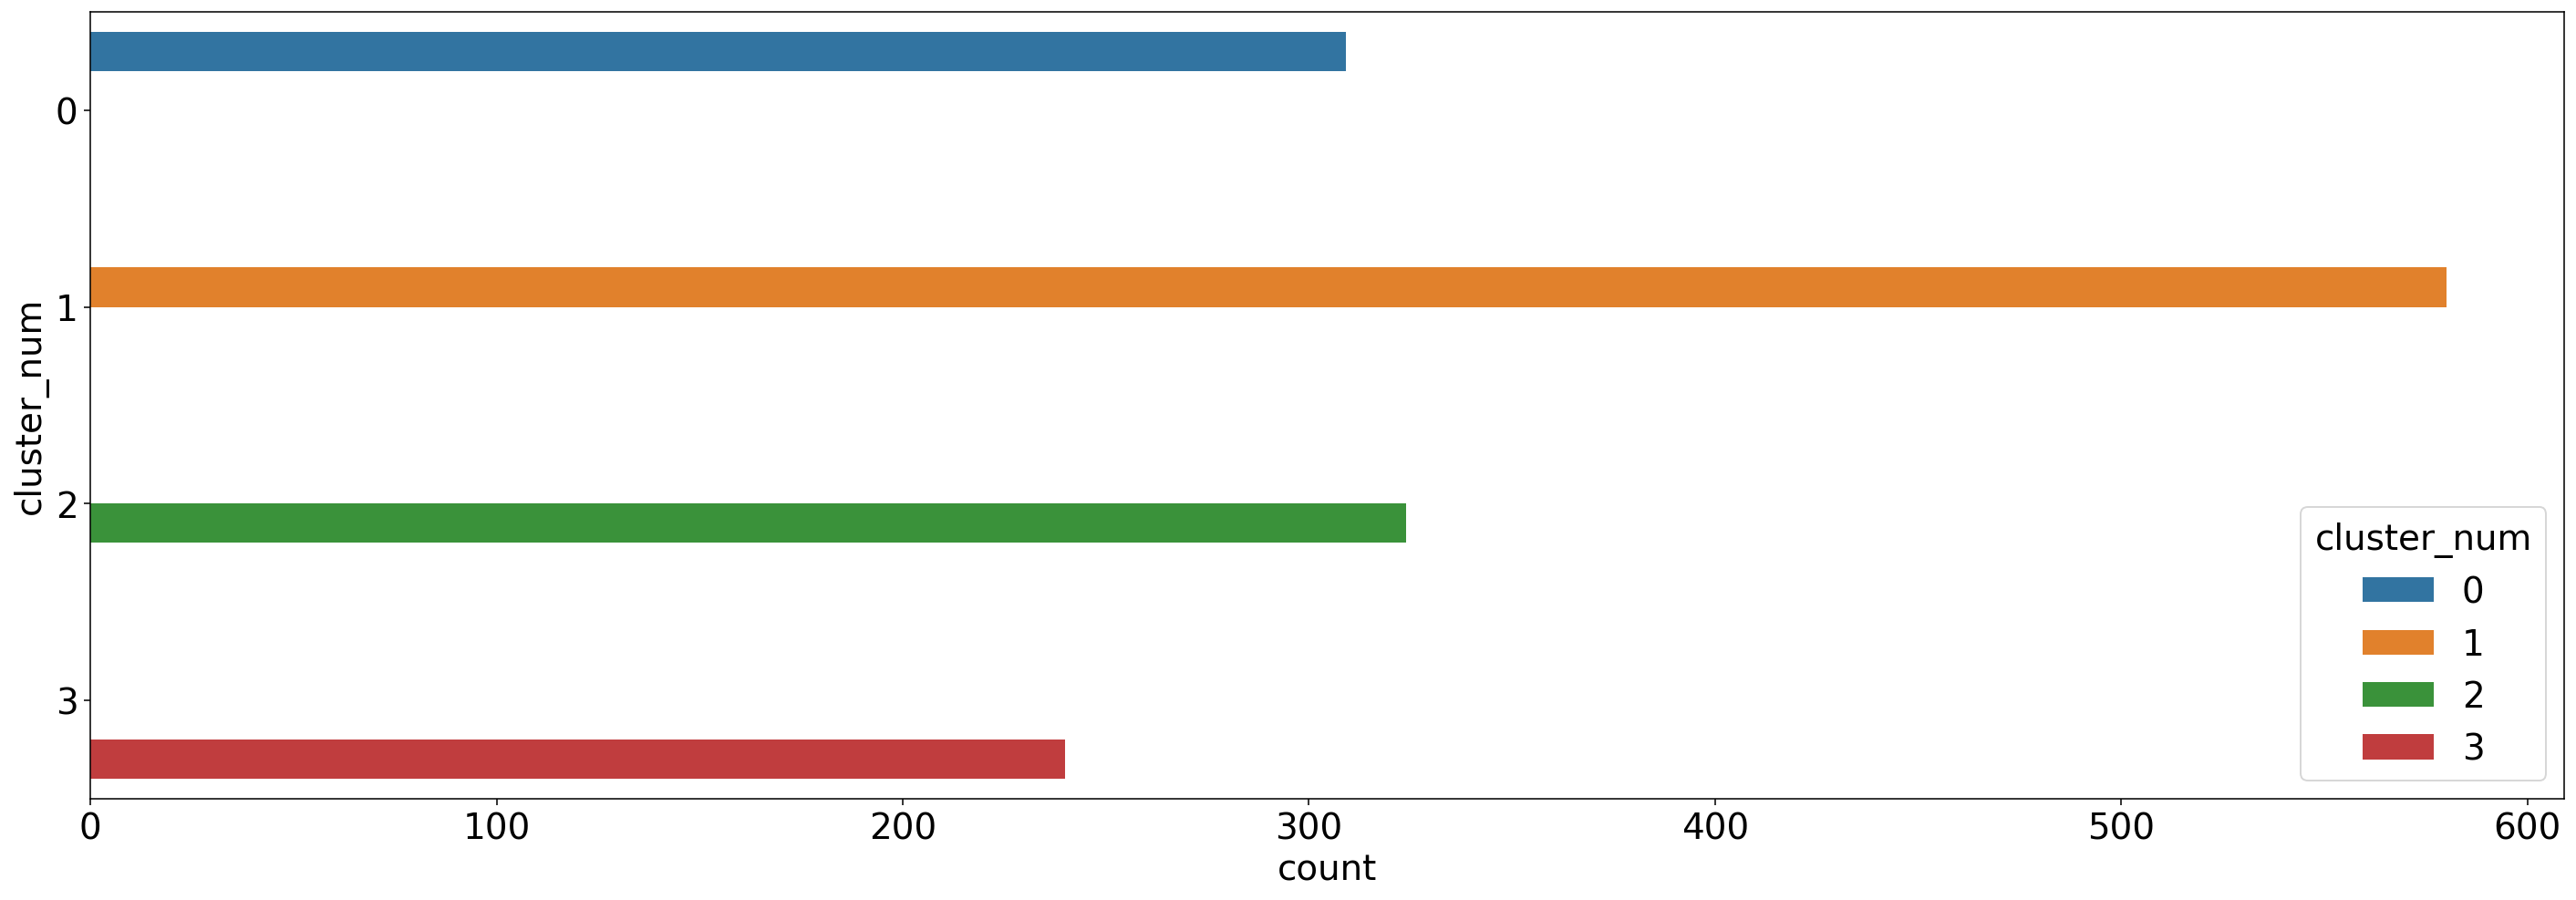

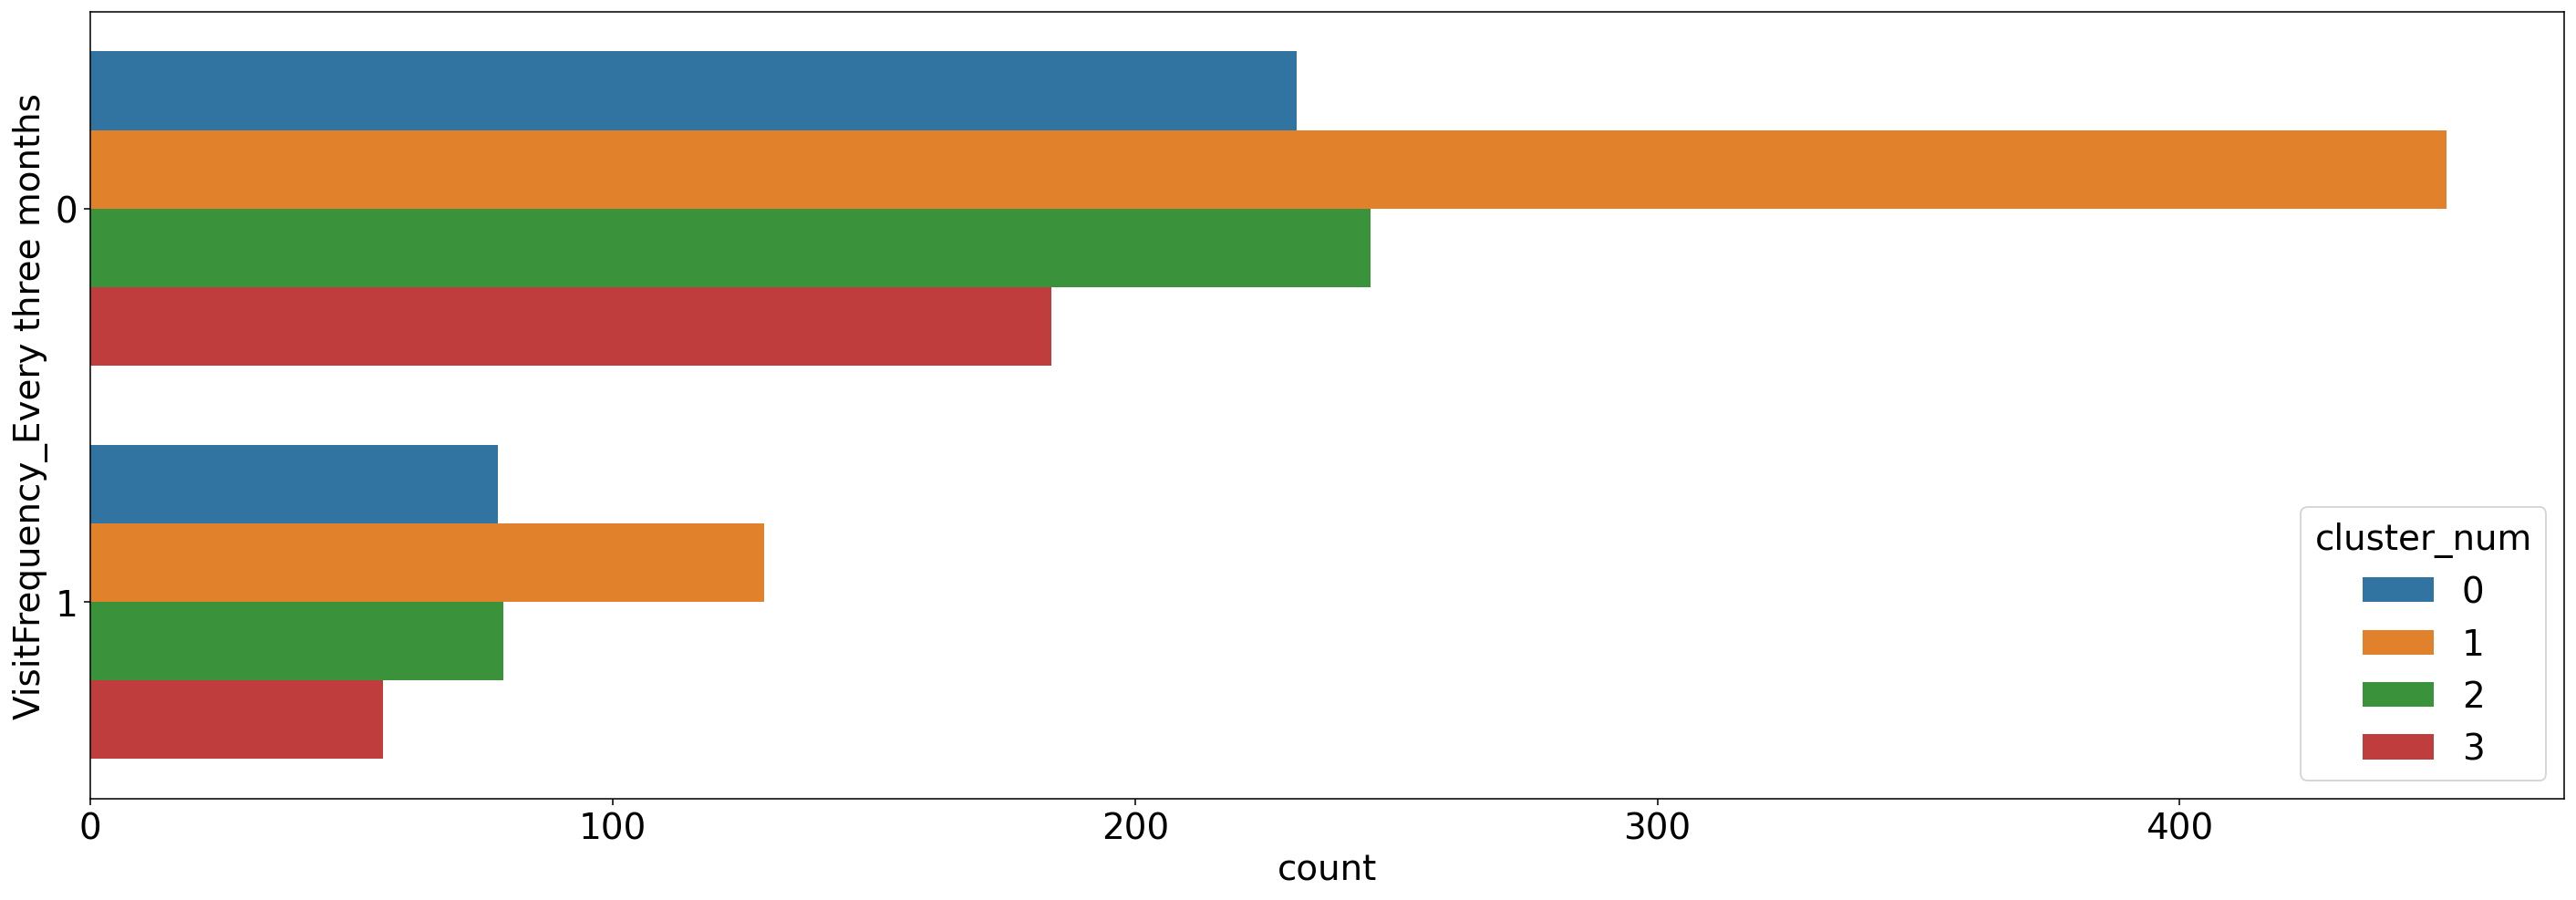

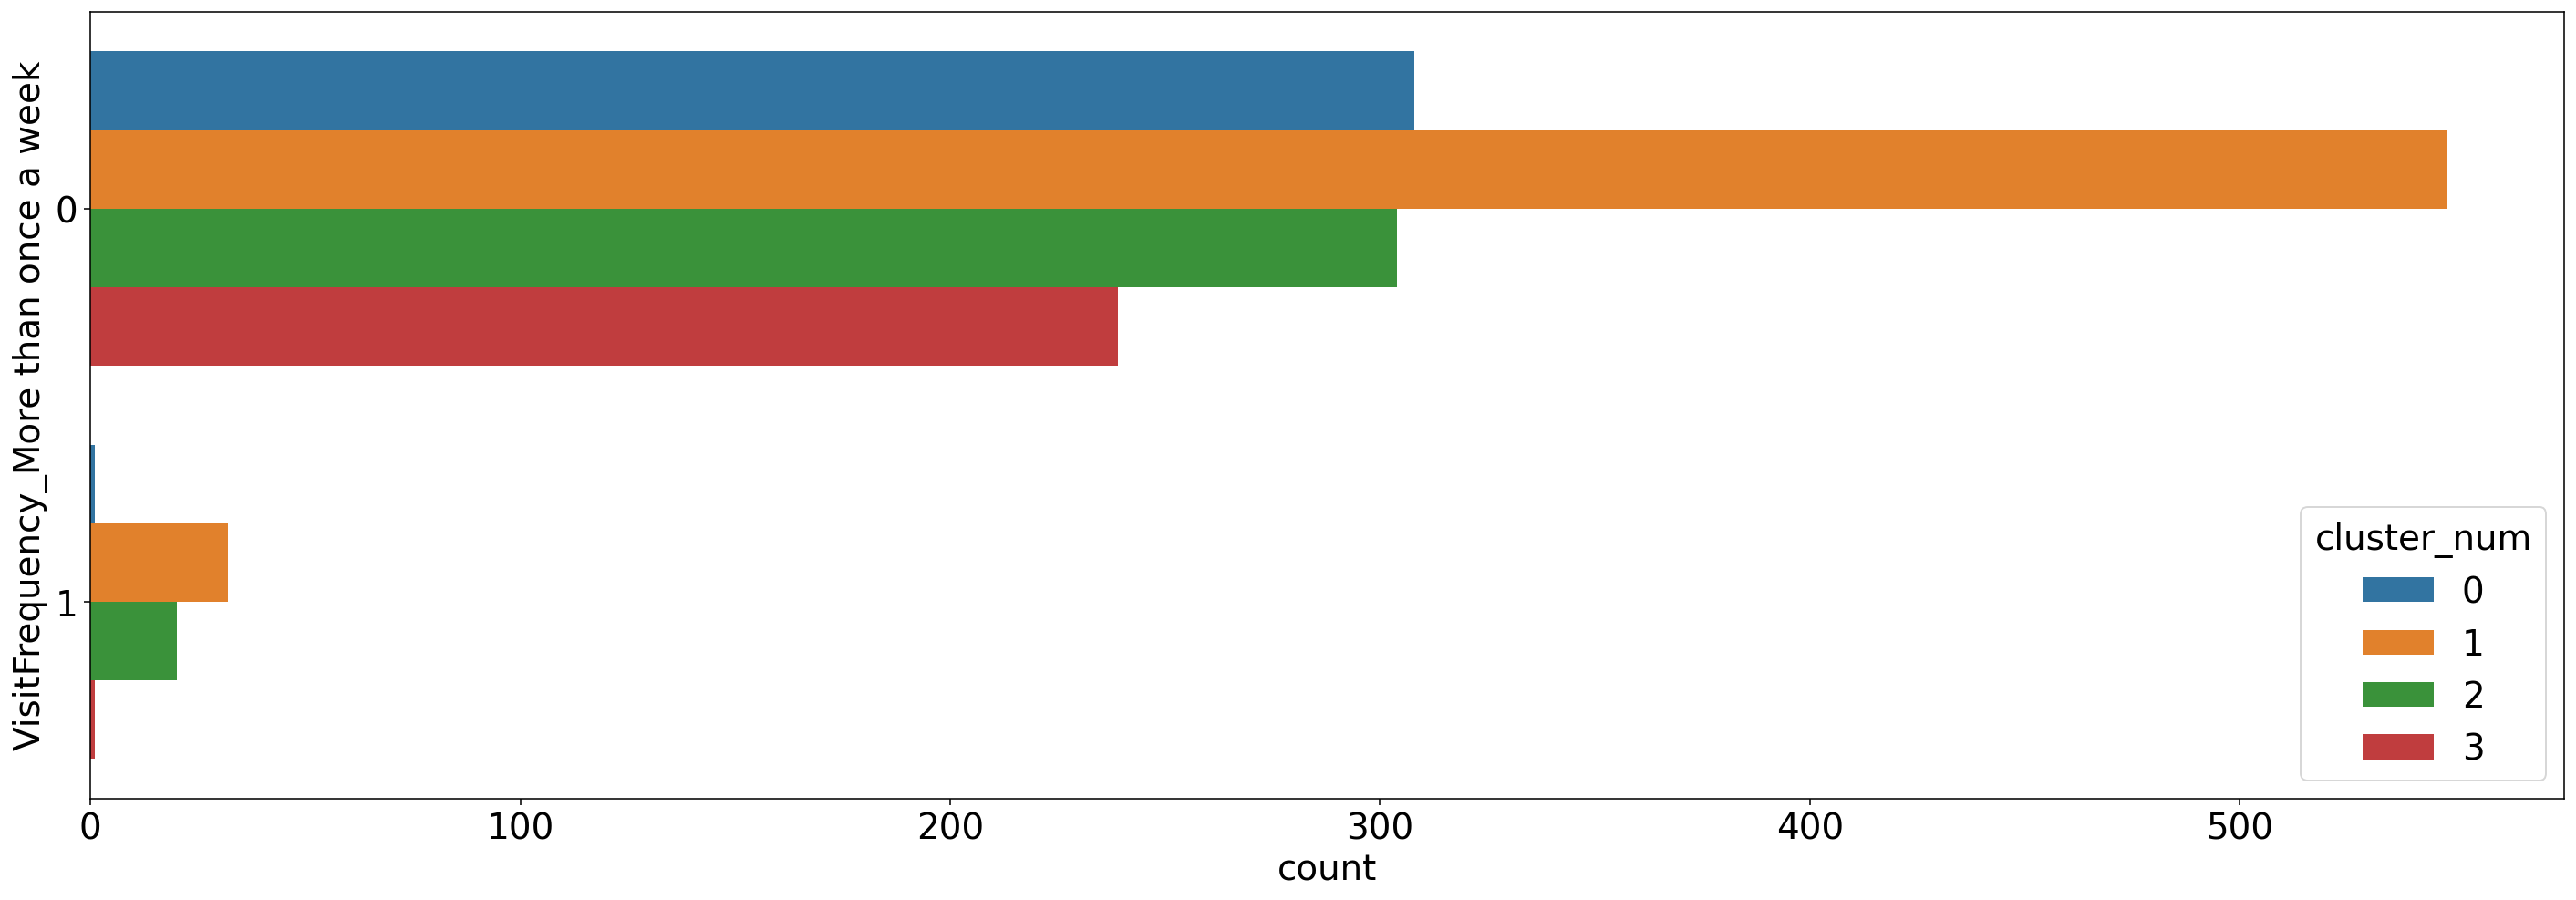

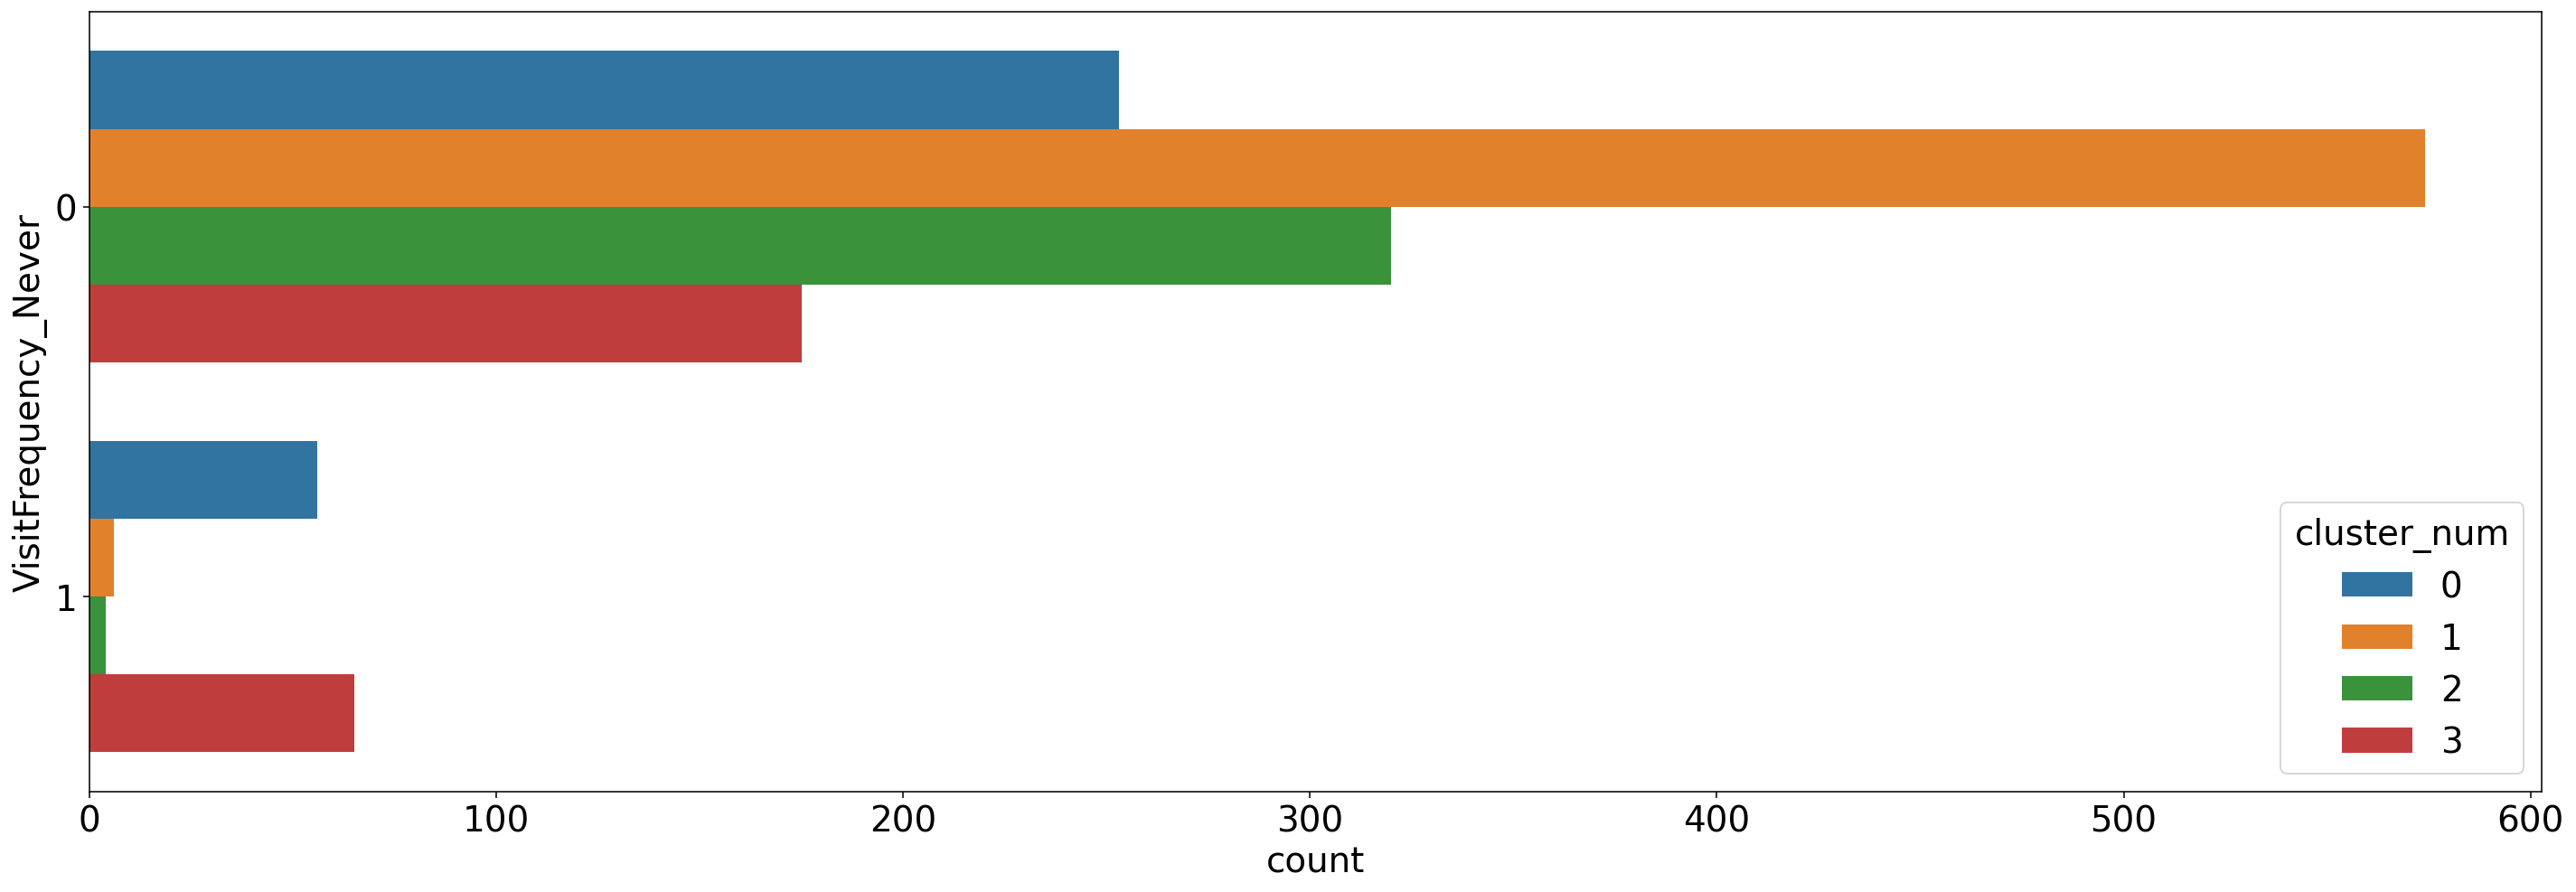

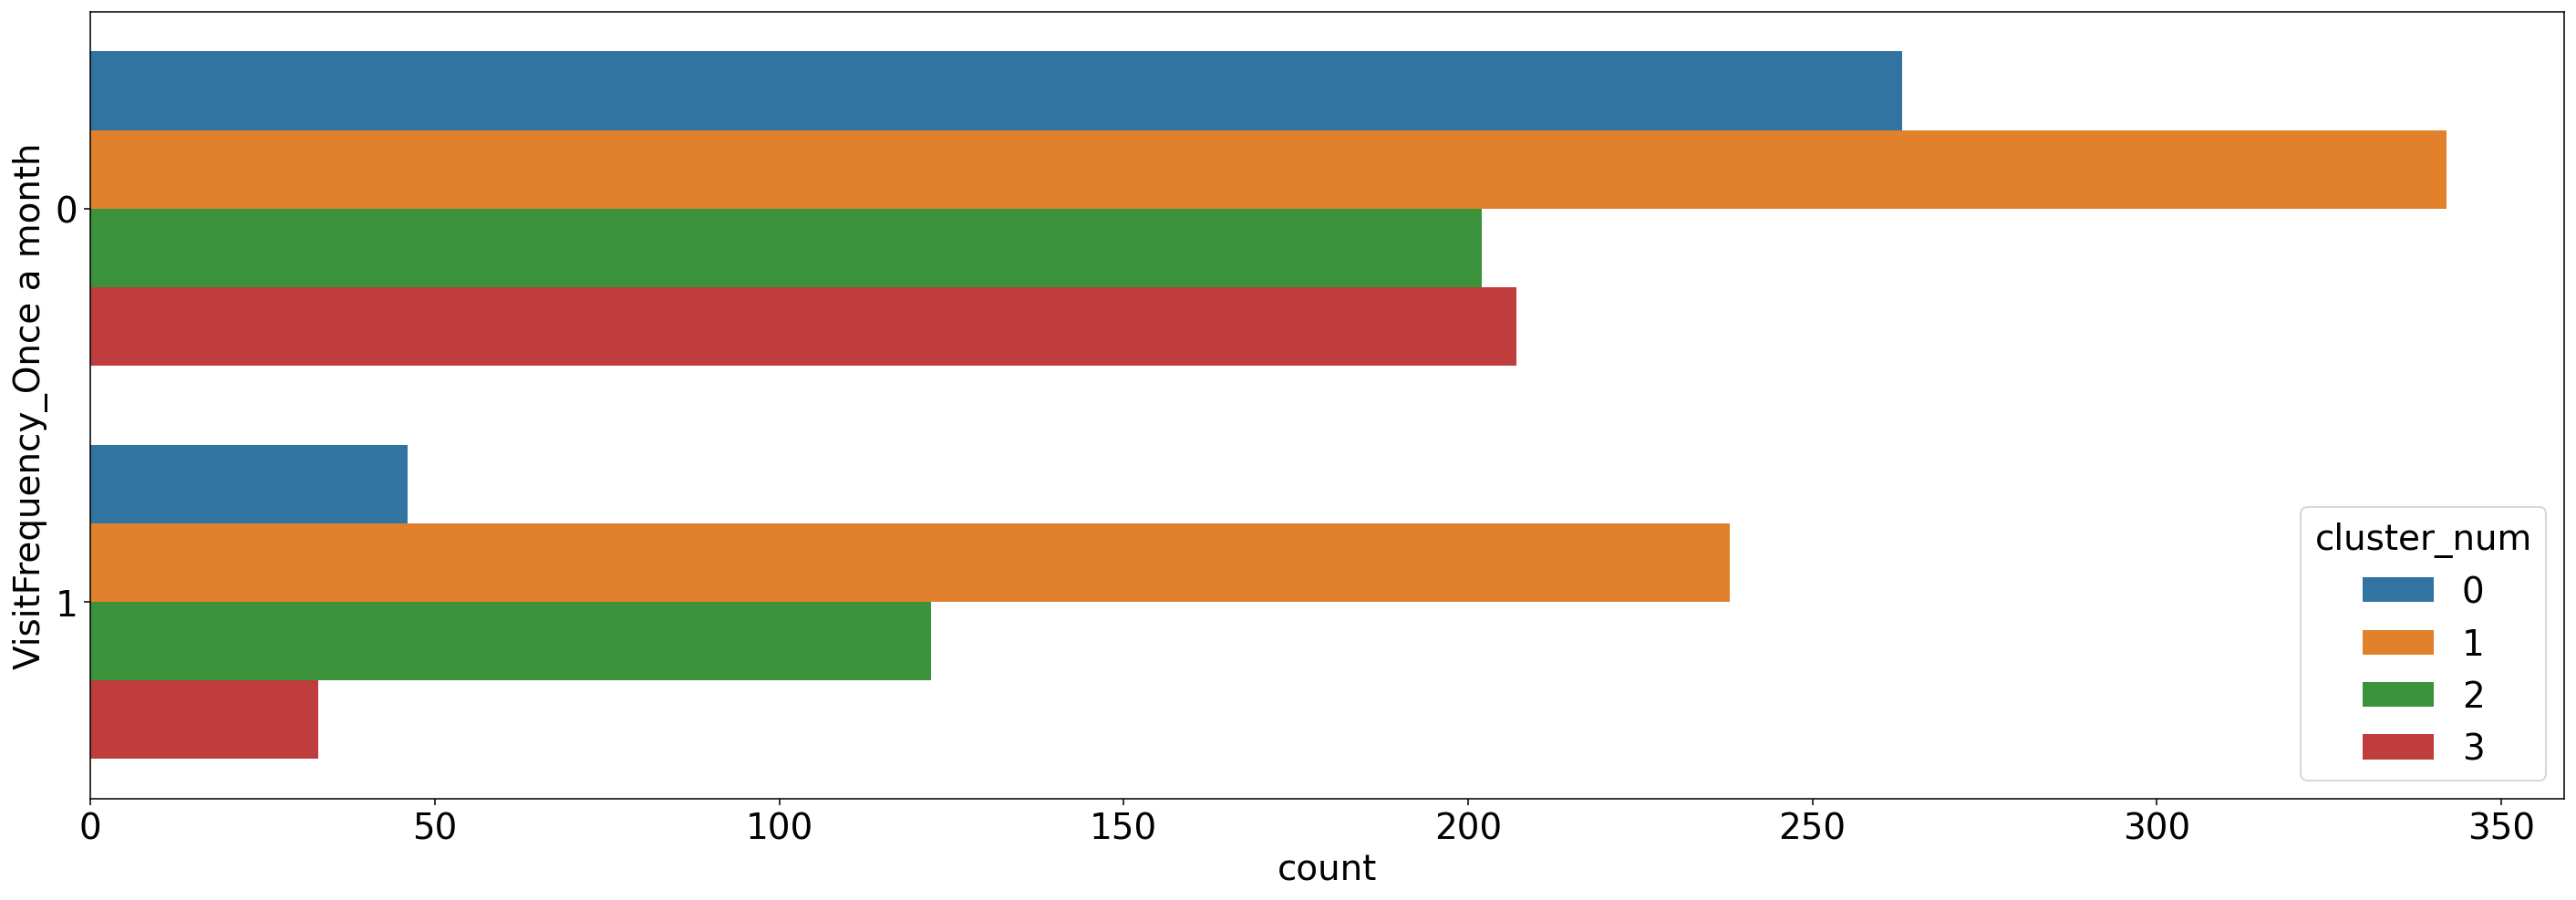

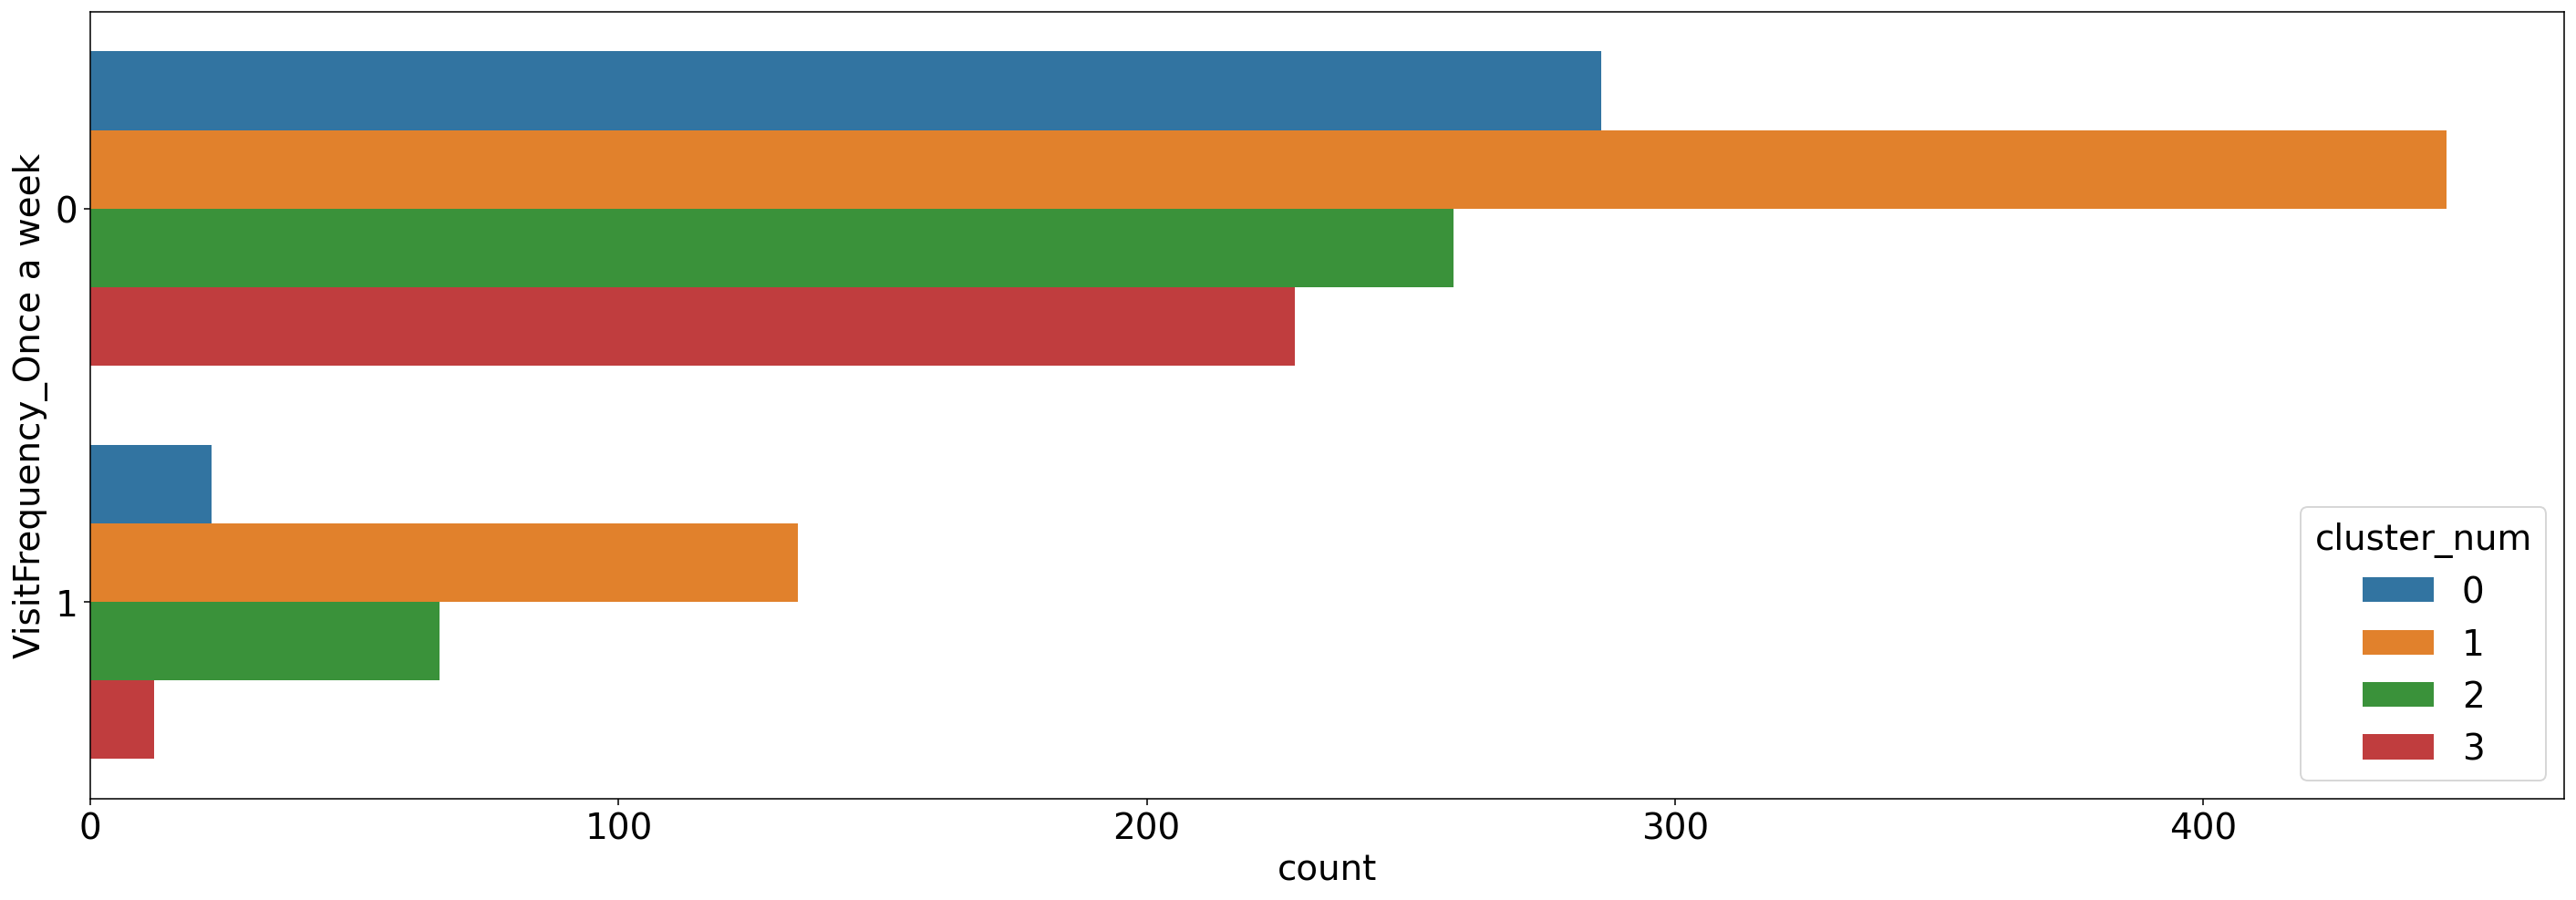

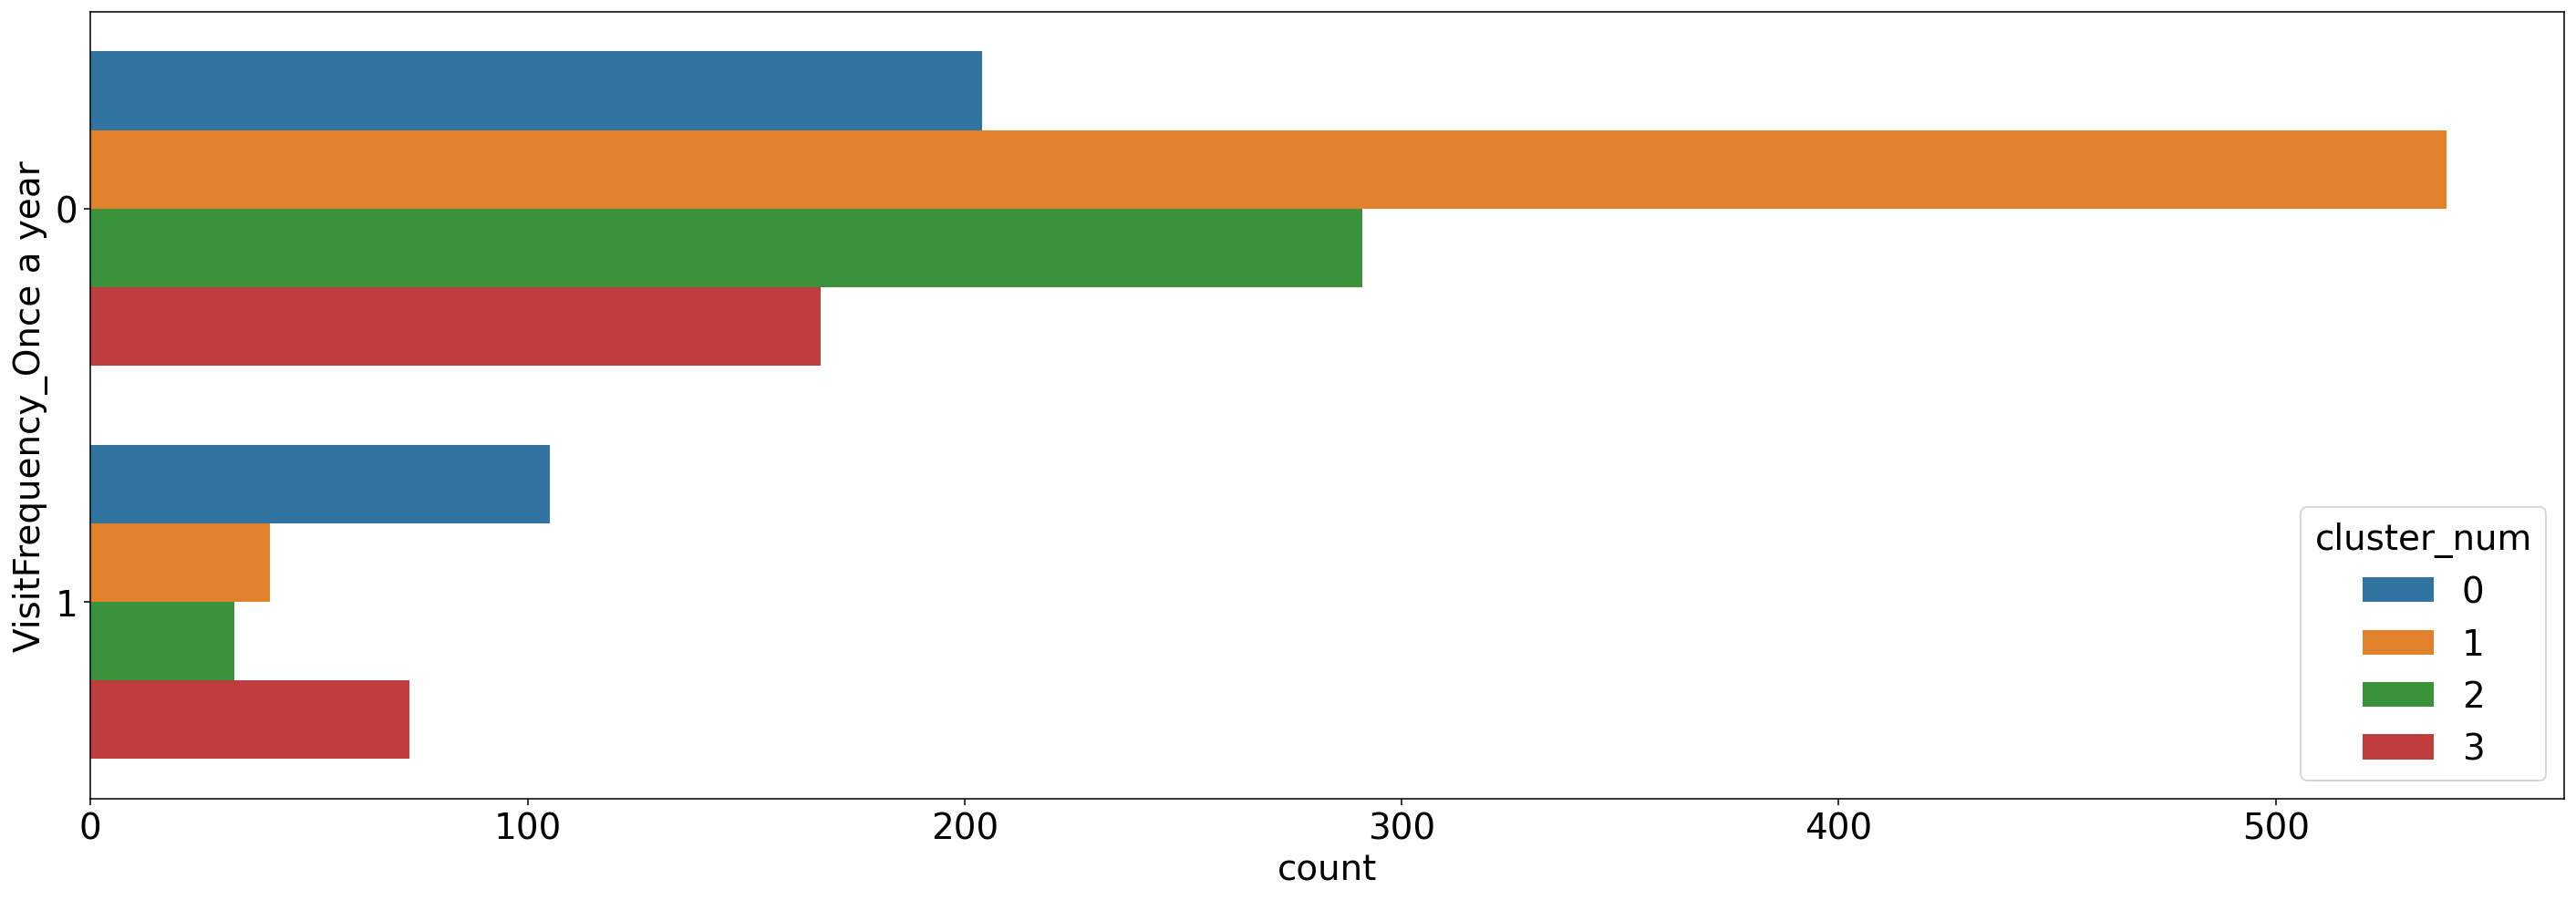

In [38]:
for i in dataset1.columns:
    sns.countplot(y=dataset1[i], hue=dataset1['cluster_num'], data=dataset1)
#     plt.rcParams['figure.figsize'] = (25, 8)
    plt.rcParams['figure.dpi'] = 140
    plt.rcParams['font.size'] = 20
    plt.show()

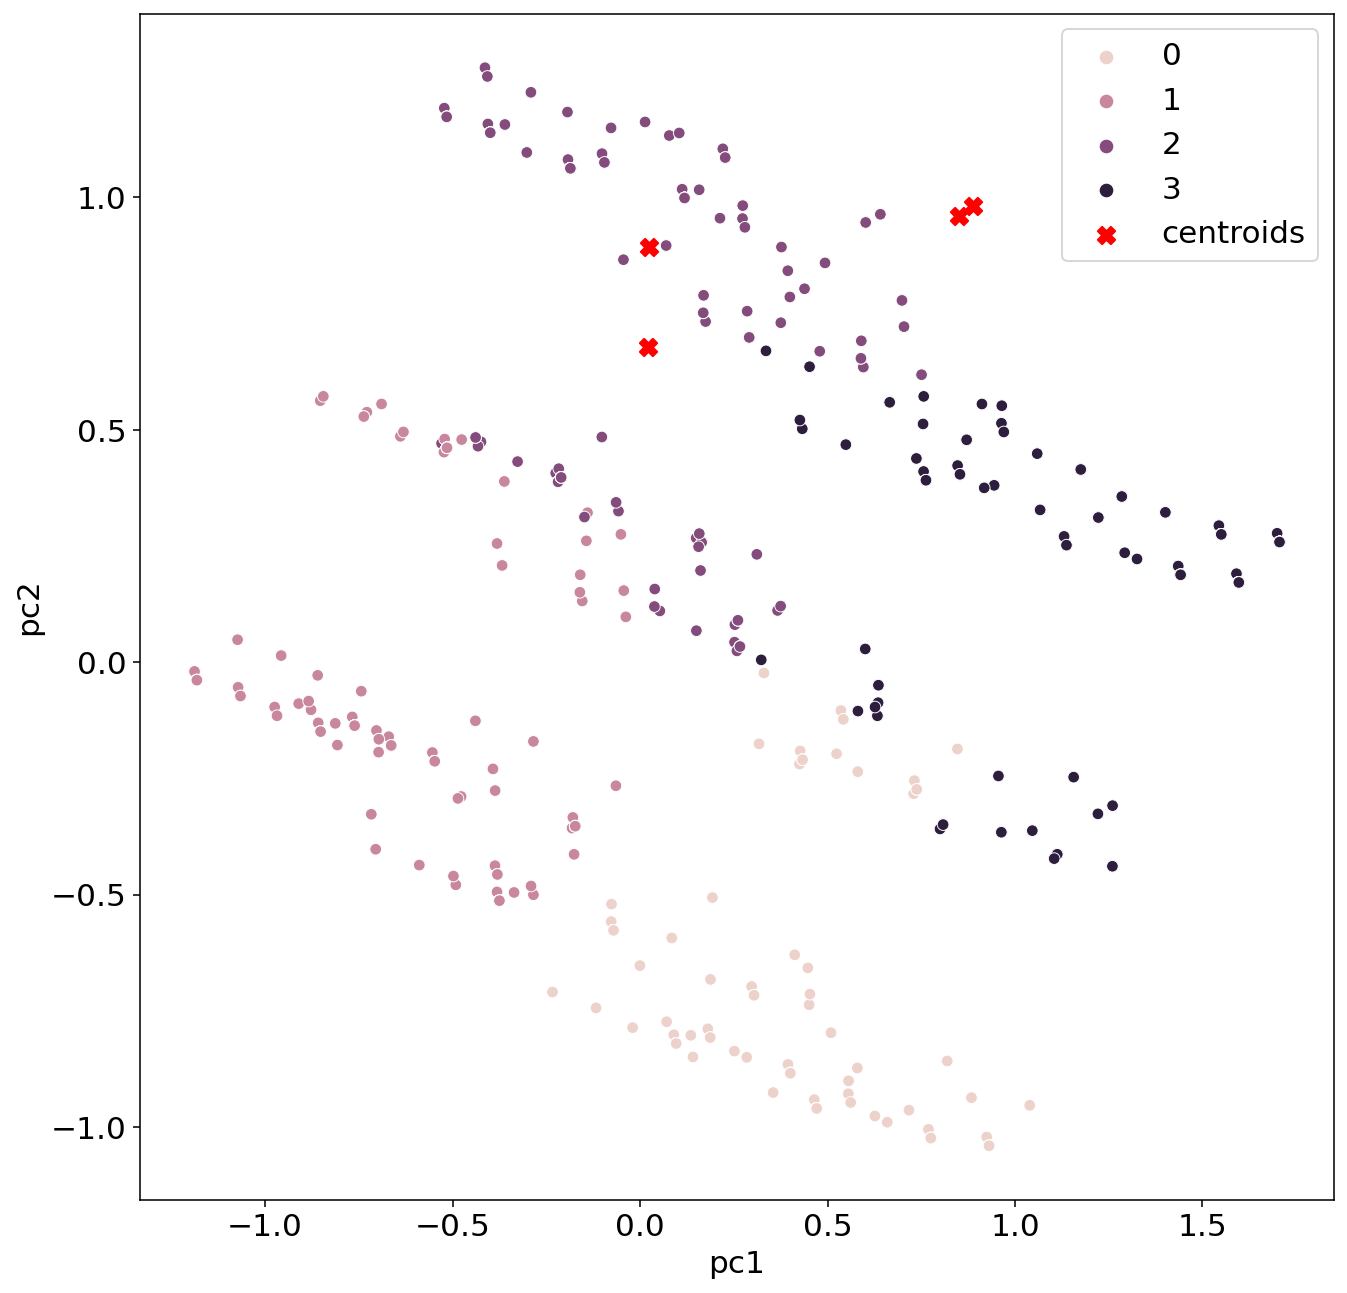

In [42]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 16
plt.legend()
plt.show()

In [43]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
crosstab =pd.crosstab(dataset['cluster_num'],dataset['Like'])
#Reordering cols
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
cluster_num,,,,,,,,,,,
0,54,36,34,29,26,53,32,31,12,2,0
1,4,4,2,6,13,43,65,90,143,111,99
2,5,4,7,6,7,36,42,60,66,47,44
3,89,27,30,18,12,37,13,6,8,0,0


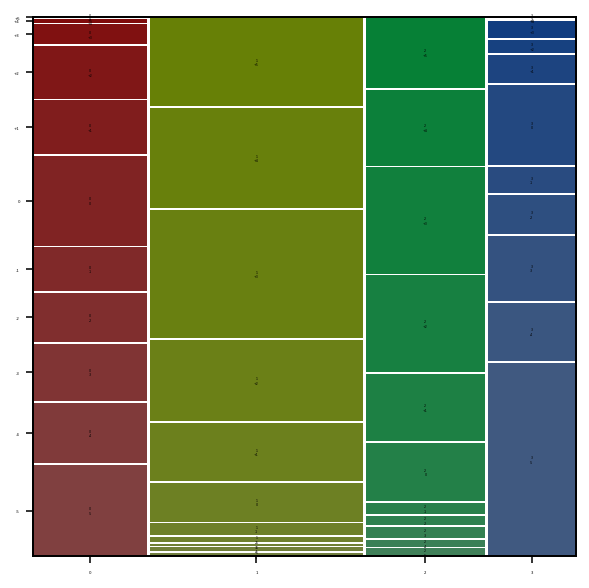

In [51]:
mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 5
plt.show()

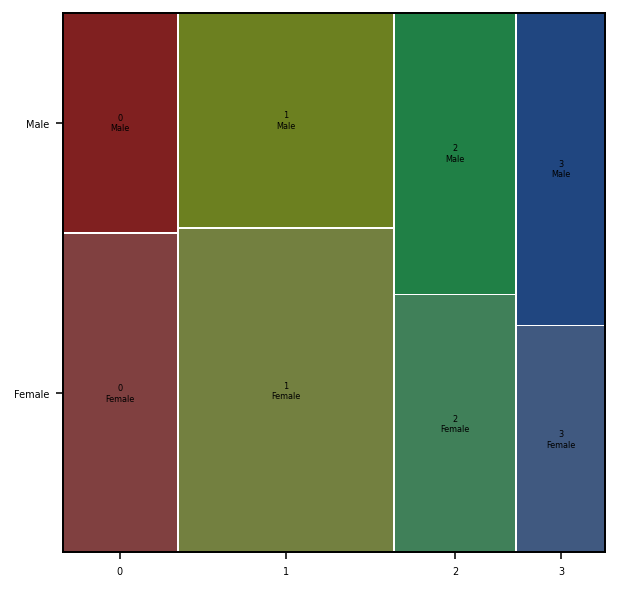

In [52]:
crosstab =pd.crosstab(dataset['cluster_num'],dataset['Gender'])
#Reordering cols
crosstab = crosstab[['Female', 'Male']]
mosaic(crosstab.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

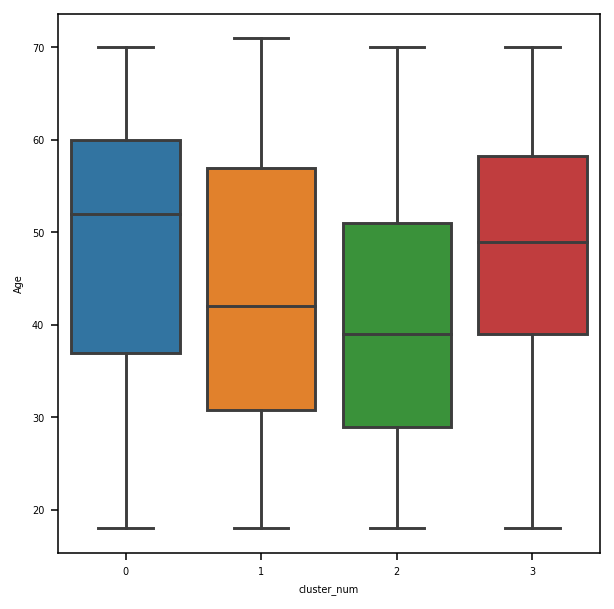

In [53]:
sns.boxplot(x='cluster_num', y='Age', data=dataset1)